In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import os
import random
from datetime import datetime
import scipy
import seaborn as sns
import time

In [2]:
# Read all files in the directory
def read_file(in_folder, percent=1, random=True):
    i = 0
    # Random sampling
    all_files = sorted(os.listdir(in_folder))
    num_files = int(np.floor(len(all_files) * percent))
    if random: 
        chosen_files = random.sample(all_files, num_files)
    else: 
        chosen_files = all_files[:num_files]
    
    for file in chosen_files:
        file_name = in_folder + file
        print(file_name)
        if file_name[-9:] == '.DS_Store':
            continue
        if i == 0:
            df = pd.read_csv(file_name)
        else:
            temp_df = pd.read_csv(file_name)
            df = pd.concat([df, temp_df]).reset_index(drop=True)
        i +=1
    print('Number of files:',format(i))
    return df

In [3]:
# df_0 = read_file('data/', percent=0.04) # 16 files
df_0 = read_file('../../data/data/', percent=0.3, random=False) # 16 files

../../data/data/.DS_Store
../../data/data/uk_obs_coordinates_000000000000
../../data/data/uk_obs_coordinates_000000000001
../../data/data/uk_obs_coordinates_000000000002
../../data/data/uk_obs_coordinates_000000000003
../../data/data/uk_obs_coordinates_000000000004
../../data/data/uk_obs_coordinates_000000000005
../../data/data/uk_obs_coordinates_000000000006
../../data/data/uk_obs_coordinates_000000000007
../../data/data/uk_obs_coordinates_000000000008
../../data/data/uk_obs_coordinates_000000000009
../../data/data/uk_obs_coordinates_000000000010
../../data/data/uk_obs_coordinates_000000000011
../../data/data/uk_obs_coordinates_000000000012
../../data/data/uk_obs_coordinates_000000000013
../../data/data/uk_obs_coordinates_000000000014
../../data/data/uk_obs_coordinates_000000000015
../../data/data/uk_obs_coordinates_000000000016
../../data/data/uk_obs_coordinates_000000000017
../../data/data/uk_obs_coordinates_000000000018
../../data/data/uk_obs_coordinates_000000000020
../../data/dat

In [4]:
df_0.shape

(78538096, 6)

In [5]:
df_0['Level'].unique()

array(['1st Floor', '2nd Floor'], dtype=object)

### Data cleaning

In [6]:
## Clean data at 1st - 3rd floor 
# df_1 = df_0.loc[df_0['Level'].isin(['Ground Floor', '1st Floor', '2nd Floor']),:]
df_1 = df_0.loc[df_0['Level'].isin(['1st Floor', '2nd Floor']),:]
print("# rows before cleaning: {}".format(df_1.shape[0]))

# For the first rectangle, I filter out  
# Logic: left min, right max
df_2 = df_1.query("lat>=51.46038149506283 and lat<=51.46054187270378")
df_2 = df_2.query("lng>=-0.9333064334614474 and lng<=-0.9322956462351958")

df_2.reset_index(inplace=True)
df_2.tail()

# rows before cleaning: 78538096


,index,Site,Level,ClientMacAddr,lat,lng,localtime
36603584,78538077,UK Office,1st Floor,5c:5f:67:8c:09:56,51.460452,-0.932343,2019-08-28 11:24:06.668 UTC
36603585,78538089,UK Office,1st Floor,58:c5:cb:d6:38:77,51.460413,-0.933010,2019-08-28 11:24:06.368 UTC
36603586,78538090,UK Office,1st Floor,5c:5f:67:8b:1b:63,51.460424,-0.933015,2019-08-28 11:24:06.368 UTC
36603587,78538091,UK Office,1st Floor,10:02:b5:e3:09:59,51.460418,-0.932635,2019-08-28 11:24:06.367 UTC
36603588,78538092,UK Office,1st Floor,c4:6e:1f:1a:81:1d,51.460427,-0.932503,2019-08-28 11:24:06.267 UTC


In [7]:
# For the second rectangle, I filter out 
df_3 = df_1.query("lat>=51.46055295640854 and lat<=51.460984859445034")
df_3 = df_3.query("lng>=-0.932590207567124 and lng<=-0.9322208241894918")
df_3.reset_index(inplace=True)
df_3.tail()
#df_1 = pd.concat([df_2, df_3], ignore_index=True)
#print("# rows after cleaning: {}".format(df_1.shape[0]))


,index,Site,Level,ClientMacAddr,lat,lng,localtime
28768107,78538087,UK Office,1st Floor,34:ab:37:0c:20:01,51.460775,-0.932322,2019-08-28 11:24:06.473 UTC
28768108,78538088,UK Office,1st Floor,6c:96:cf:a1:9a:e1,51.460674,-0.932346,2019-08-28 11:24:06.473 UTC
28768109,78538093,UK Office,1st Floor,9c:da:3e:80:28:25,51.460943,-0.932291,2019-08-28 11:24:06.171 UTC
28768110,78538094,UK Office,1st Floor,38:80:df:58:3e:8a,51.460960,-0.932294,2019-08-28 11:24:06.171 UTC
28768111,78538095,UK Office,1st Floor,38:80:df:6f:33:6b,51.460960,-0.932294,2019-08-28 11:24:06.171 UTC


In [8]:
#Merging df_2 and df_3
df_1 = pd.concat([df_2, df_3], ignore_index=True).drop_duplicates(subset=['index']).drop(columns=['index'])
print("# rows after cleaning: {}".format(df_1.shape[0]))
df_1.head(10)

# rows after cleaning: 65371701


,Site,Level,ClientMacAddr,lat,lng,localtime
0,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:49.582 UTC
1,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:38.112 UTC
2,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460448,-0.933048,2020-09-01 23:58:29.514 UTC
3,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:18.046 UTC
4,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:09.522 UTC
5,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:57:57.986 UTC
6,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:57:44.417 UTC
7,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:57:34.422 UTC
8,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:57:27.891 UTC
9,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:57:19.409 UTC


In [9]:
## Clean data at 4th floor 
df_4 = df_0.loc[df_0['Level']=='3rd Floor',:]
print("# rows before cleaning: {}".format(df_4.shape[0]))

# For the 4th floor, I filter out  
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")
print("# rows after cleaning: {}".format(df_4.shape[0]))


# rows before cleaning: 0
# rows after cleaning: 0


In [10]:
# Combined all filtered df
cleaned_df = pd.concat([df_1, df_4], ignore_index=True)
df = cleaned_df
print("# of total rows after cleaning: {}".format(df.shape[0]))

# of total rows after cleaning: 65371701


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65371701 entries, 0 to 65371700
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Site           object 
 1   Level          object 
 2   ClientMacAddr  object 
 3   lat            float64
 4   lng            float64
 5   localtime      object 
dtypes: float64(2), object(4)
memory usage: 2.9+ GB


## TODO: 
1. Remove outliers by fixing the boundary 
2. Identify fixed and mobile device
3. Engineering Job function 
4. Security level
5. Zone
6. Maintenance or not (if machine)

## Add date time columns

In [12]:
start_time = time.time()
df['normalized_time'] = pd.to_datetime(df['localtime'], format="%Y-%m-%d %H:%M:%S.%f %Z", errors="coerce").fillna(pd.to_datetime(df['localtime'], format="%Y-%m-%d %H:%M:%S %Z", errors="coerce"))
df['localtime'] = df['normalized_time']
print("--- %s mins ---" % (int(time.time() - start_time)/60))

start_time = time.time()
df['date']  = df['localtime'].dt.date
#df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df['min']  = df['localtime'].dt.minute
df['hour']  = df['localtime'].dt.hour
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
print("--- %s mins ---" % (int(time.time() - start_time)/60))

--- 17.416666666666668 mins ---
--- 0.25 mins ---


In [192]:
df.head()

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session,job_function,veh_authority_level,min
0,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:49.582000+00:00,2020-09-01 23:58:49.582000+00:00,2020-09-01,23,1,False,night_time,operator,1,58
1,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:38.112000+00:00,2020-09-01 23:58:38.112000+00:00,2020-09-01,23,1,False,night_time,operator,1,58
2,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460448,-0.933048,2020-09-01 23:58:29.514000+00:00,2020-09-01 23:58:29.514000+00:00,2020-09-01,23,1,False,night_time,operator,1,58
3,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:18.046000+00:00,2020-09-01 23:58:18.046000+00:00,2020-09-01,23,1,False,night_time,operator,1,58
4,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:09.522000+00:00,2020-09-01 23:58:09.522000+00:00,2020-09-01,23,1,False,night_time,operator,1,58


In [13]:
## Add working hours or night time

In [14]:
b = [0,5,21,24]
l = ['night_time', 'working_hour','night_time']
df['session'] = pd.cut(df['hour'], bins=b, labels=l, include_lowest=True, ordered=False)
df.head()

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session
0,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:49.582000+00:00,2020-09-01 23:58:49.582000+00:00,2020-09-01,23,1,False,night_time
1,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:38.112000+00:00,2020-09-01 23:58:38.112000+00:00,2020-09-01,23,1,False,night_time
2,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460448,-0.933048,2020-09-01 23:58:29.514000+00:00,2020-09-01 23:58:29.514000+00:00,2020-09-01,23,1,False,night_time
3,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:18.046000+00:00,2020-09-01 23:58:18.046000+00:00,2020-09-01,23,1,False,night_time
4,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:09.522000+00:00,2020-09-01 23:58:09.522000+00:00,2020-09-01,23,1,False,night_time


In [15]:
df[df["session"] == 'working_hour']['hour'].unique()

array([21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6])

In [16]:
df[df["session"] == 'night_time']['hour'].unique()

array([23, 22,  5,  4,  3,  2,  1,  0])

In [17]:
df.head()

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session
0,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:49.582000+00:00,2020-09-01 23:58:49.582000+00:00,2020-09-01,23,1,False,night_time
1,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:38.112000+00:00,2020-09-01 23:58:38.112000+00:00,2020-09-01,23,1,False,night_time
2,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460448,-0.933048,2020-09-01 23:58:29.514000+00:00,2020-09-01 23:58:29.514000+00:00,2020-09-01,23,1,False,night_time
3,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:18.046000+00:00,2020-09-01 23:58:18.046000+00:00,2020-09-01,23,1,False,night_time
4,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:09.522000+00:00,2020-09-01 23:58:09.522000+00:00,2020-09-01,23,1,False,night_time


In [18]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-08-28
2020-09-01


## Frequency in days

In [19]:
frequency = df.groupby('ClientMacAddr')['date'].agg(total_day='nunique', total_signal = 'count').reset_index()
frequency

,ClientMacAddr,total_day,total_signal
0,00:08:22:00:b9:fb,1,13
1,00:08:22:0a:b9:fb,1,1
2,00:08:22:0e:c4:fb,1,2
3,00:08:22:12:c5:fb,1,13
4,00:08:22:20:bc:fb,1,6
...,...,...,...
18979,fc:d8:48:80:ab:de,2,315
18980,fc:db:b3:30:28:c9,1,13
18981,fc:db:b3:31:4e:a8,1,13
18982,fc:f8:ae:5a:6f:ea,1,321


In [20]:
# Frequency in days
frequency['total_day'].value_counts()

1      15193
2       1181
3        427
4        257
5        203
       ...  
153        1
100        1
118        1
142        1
94         1
Name: total_day, Length: 112, dtype: int64

## Weekend & Weekday

In [21]:
# Weekend or weekdays
isWeekend = df.groupby(['ClientMacAddr', 'IsWeekend'])['date'].nunique().rename('Days').reset_index()
isWeekend

,ClientMacAddr,IsWeekend,Days
0,00:08:22:00:b9:fb,False,1
1,00:08:22:0a:b9:fb,False,1
2,00:08:22:0e:c4:fb,False,1
3,00:08:22:12:c5:fb,False,1
4,00:08:22:20:bc:fb,False,1
...,...,...,...
19107,fc:d8:48:80:ab:de,False,2
19108,fc:db:b3:30:28:c9,False,1
19109,fc:db:b3:31:4e:a8,False,1
19110,fc:f8:ae:5a:6f:ea,False,1


In [22]:
# Data in weekday
df_weekday = isWeekend[isWeekend['IsWeekend'] == False].sort_values('Days', ascending=False)
df_weekday = df_weekday[['ClientMacAddr', 'Days']]
df_weekday

,ClientMacAddr,Days
12595,9c:8c:6e:46:0b:7c,242
12599,9c:8c:6e:46:1c:5e,242
4349,40:83:de:81:43:54,142
12042,8c:f5:a3:cd:d2:db,138
8733,88:66:a5:45:b9:ea,112
...,...,...
7338,80:58:f8:83:da:0d,1
7339,80:58:f8:83:da:31,1
7340,80:58:f8:84:12:d7,1
7341,80:58:f8:84:23:43,1


In [23]:
# Data in weekend
df_weekend = isWeekend[isWeekend['IsWeekend'] == True].sort_values('Days', ascending=False)
df_weekend = df_weekend[['ClientMacAddr', 'Days']]
print(df_weekend.shape)
df_weekend
# in Weekend
# Security guard
# Technician
# Employee overtimea
# Machine

(201, 2)


,ClientMacAddr,Days
12600,9c:8c:6e:46:1c:5e,96
12596,9c:8c:6e:46:0b:7c,96
8734,88:66:a5:45:b9:ea,50
470,00:c2:c6:cc:a8:85,43
13869,c4:6e:1f:1a:81:1d,37
...,...,...
6152,80:01:84:7f:3e:0d,1
3191,24:77:03:db:31:94,1
6069,7c:b2:7d:86:43:9f,1
3192,24:77:03:dc:59:d4,1


In [24]:
min_lng = min(df['lng'])
max_lng = max(df['lng'])
min_lat = min(df['lat'])
max_lat = max(df['lat'])

In [25]:
# # Visualize the distance for weekend mac id
# weekend_presence = np.array(df_weekend['ClientMacAddr'])
# for i in weekend_presence :
#     person = df[df['ClientMacAddr'] == i ]
#     print(i)
#     person_min_lng = min(person['lng'])
#     person_max_lng = max(person['lng'])
#     person_min_lat = min(person['lat'])
#     person_max_lat = max(person['lat'])
#     person_distance = 111139 * ((person_max_lng - person_min_lng)**2 + (person_max_lat - person_min_lat)**2)**0.5
#     print(person_distance)
#     plt.scatter(person['lng'], person['lat'])
#     plt.xlim([min_lng, max_lng])
#     plt.ylim([min_lat, max_lat])
#     plt.show()

In [26]:
# Distribution for max distance
temp1 = df.groupby('ClientMacAddr')['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby('ClientMacAddr')['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on='ClientMacAddr')
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp = temp.merge(frequency, on='ClientMacAddr')
temp.sort_values('Distance(Meter)', ascending = False)

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal
14010,cc:73:14:60:68:97,51.460960,51.460381,-0.932221,-0.933236,129.883520,94,167374
13329,b4:9c:df:7b:7d:a0,51.460960,51.460381,-0.932221,-0.933236,129.875798,26,41305
13514,bc:9f:ef:12:17:ff,51.460960,51.460382,-0.932221,-0.933236,129.873624,74,156147
13095,a8:db:03:52:33:06,51.460960,51.460382,-0.932221,-0.933236,129.871349,56,85817
5122,5c:5f:67:8b:28:01,51.460960,51.460381,-0.932221,-0.933236,129.864643,64,161339
...,...,...,...,...,...,...,...,...
10218,88:b4:a6:76:f1:d8,51.460472,51.460472,-0.933108,-0.933108,0.000000,1,13
10219,88:b4:a6:77:4d:34,51.460443,51.460443,-0.933137,-0.933137,0.000000,1,13
10220,88:b4:a6:77:5e:0e,51.460439,51.460439,-0.932596,-0.932596,0.000000,1,13
10221,88:b4:a6:77:82:1f,51.460463,51.460463,-0.932895,-0.932895,0.000000,1,13


In [27]:
# Add Weekdays and Weekend
df_temp = temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})

## Remove outliers: remove ClientMacAddr that has only 1 signal (row)
df_temp = df_temp.loc[df_temp['total_signal'] > 1,:]
df_temp

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend
0,00:08:22:00:b9:fb,51.460393,51.460393,-0.932497,-0.932497,0.085973,1,13,1.0,0.0
2,00:08:22:0e:c4:fb,51.460420,51.460420,-0.932617,-0.932617,0.000000,1,2,1.0,0.0
3,00:08:22:12:c5:fb,51.460889,51.460885,-0.932342,-0.932345,0.658860,1,13,1.0,0.0
4,00:08:22:20:bc:fb,51.460448,51.460382,-0.932492,-0.932658,19.917625,1,6,1.0,0.0
5,00:08:22:24:b7:fb,51.460696,51.460633,-0.932276,-0.932314,8.172743,1,11,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18979,fc:d8:48:80:ab:de,51.460513,51.460386,-0.932489,-0.933054,64.369748,2,315,2.0,0.0
18980,fc:db:b3:30:28:c9,51.460430,51.460430,-0.932624,-0.932624,0.000000,1,13,1.0,0.0
18981,fc:db:b3:31:4e:a8,51.460411,51.460411,-0.933036,-0.933036,0.000000,1,13,1.0,0.0
18982,fc:f8:ae:5a:6f:ea,51.460608,51.460410,-0.932323,-0.932448,26.020636,1,321,1.0,0.0


In [28]:
df.head()

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session
0,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:49.582000+00:00,2020-09-01 23:58:49.582000+00:00,2020-09-01,23,1,False,night_time
1,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:38.112000+00:00,2020-09-01 23:58:38.112000+00:00,2020-09-01,23,1,False,night_time
2,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460448,-0.933048,2020-09-01 23:58:29.514000+00:00,2020-09-01 23:58:29.514000+00:00,2020-09-01,23,1,False,night_time
3,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:18.046000+00:00,2020-09-01 23:58:18.046000+00:00,2020-09-01,23,1,False,night_time
4,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:09.522000+00:00,2020-09-01 23:58:09.522000+00:00,2020-09-01,23,1,False,night_time


In [29]:
#df[(df['session']=='night_time') & (df['ClientMacAddr']=='9c:8c:6e:46:1c:5e')].head(40)

In [30]:
## Changes here ###

## Crate session(working hours or night_time) and spending hours per day, then classify intruders

In [31]:
## 1. Identifty day or night time of each mac address
session_df = df.groupby('ClientMacAddr')['session'].agg([set]).reset_index()
session_df

,ClientMacAddr,set
0,00:08:22:00:b9:fb,{working_hour}
1,00:08:22:0a:b9:fb,{working_hour}
2,00:08:22:0e:c4:fb,{working_hour}
3,00:08:22:12:c5:fb,{working_hour}
4,00:08:22:20:bc:fb,{working_hour}
...,...,...
18979,fc:d8:48:80:ab:de,{working_hour}
18980,fc:db:b3:30:28:c9,{working_hour}
18981,fc:db:b3:31:4e:a8,{working_hour}
18982,fc:f8:ae:5a:6f:ea,{working_hour}


In [32]:
# 2. calculate avg duration per day presents the building
temp1_time = df.groupby(['ClientMacAddr', 'date'])['localtime'].agg(max_time='max', min_time='min').reset_index()
temp1_time['time_diff_tran'] = (temp1_time['max_time'] - temp1_time['min_time']).dt.total_seconds() / 3600
temp1_time
# print(temp1_time[temp1_time['ClientMacAddr'] =='9c:8c:6e:46:1c:5e'])
# avg_time_diff = temp1_time.groupby('ClientMacAddr').agg(avg_time_per_day='mean').reset_index()
# avg_time_diff

,ClientMacAddr,date,max_time,min_time,time_diff_tran
0,00:08:22:00:b9:fb,2020-02-27,2020-02-27 14:18:35.682000+00:00,2020-02-27 14:16:35.822000+00:00,0.033294
1,00:08:22:0a:b9:fb,2020-03-02,2020-03-02 07:55:24.898000+00:00,2020-03-02 07:55:24.898000+00:00,0.000000
2,00:08:22:0e:c4:fb,2019-10-17,2019-10-17 12:09:07+00:00,2019-10-17 12:07:32.660000+00:00,0.026206
3,00:08:22:12:c5:fb,2019-12-16,2019-12-16 10:00:43.672000+00:00,2019-12-16 09:58:47.174000+00:00,0.032361
4,00:08:22:20:bc:fb,2020-06-15,2020-06-15 07:37:15.185000+00:00,2020-06-15 07:22:29.152000+00:00,0.246120
...,...,...,...,...,...
66671,fc:d8:48:80:ab:de,2020-02-19,2020-02-19 11:57:52.093000+00:00,2020-02-19 11:15:49.900000+00:00,0.700609
66672,fc:db:b3:30:28:c9,2020-01-10,2020-01-10 18:38:48.167000+00:00,2020-01-10 18:36:45.694000+00:00,0.034020
66673,fc:db:b3:31:4e:a8,2020-02-26,2020-02-26 09:51:31.095000+00:00,2020-02-26 09:49:37.749000+00:00,0.031485
66674,fc:f8:ae:5a:6f:ea,2020-02-11,2020-02-11 15:12:24.818000+00:00,2020-02-11 14:16:25.301000+00:00,0.933199


In [33]:
avg_time_diff = temp1_time.groupby('ClientMacAddr')['time_diff_tran'].agg(avg_time_per_day='mean').reset_index()
print(avg_time_diff[avg_time_diff['ClientMacAddr'] =='9c:8c:6e:46:1c:5e'])
avg_time_diff

           ClientMacAddr  avg_time_per_day
12512  9c:8c:6e:46:1c:5e         23.683198


,ClientMacAddr,avg_time_per_day
0,00:08:22:00:b9:fb,0.033294
1,00:08:22:0a:b9:fb,0.000000
2,00:08:22:0e:c4:fb,0.026206
3,00:08:22:12:c5:fb,0.032361
4,00:08:22:20:bc:fb,0.246120
...,...,...
18979,fc:d8:48:80:ab:de,0.433865
18980,fc:db:b3:30:28:c9,0.034020
18981,fc:db:b3:31:4e:a8,0.031485
18982,fc:f8:ae:5a:6f:ea,0.933199


In [34]:
# Join both dataframe
duration_df = pd.merge(session_df, avg_time_diff, how='left', on = 'ClientMacAddr')
duration_df

,ClientMacAddr,set,avg_time_per_day
0,00:08:22:00:b9:fb,{working_hour},0.033294
1,00:08:22:0a:b9:fb,{working_hour},0.000000
2,00:08:22:0e:c4:fb,{working_hour},0.026206
3,00:08:22:12:c5:fb,{working_hour},0.032361
4,00:08:22:20:bc:fb,{working_hour},0.246120
...,...,...,...
18979,fc:d8:48:80:ab:de,{working_hour},0.433865
18980,fc:db:b3:30:28:c9,{working_hour},0.034020
18981,fc:db:b3:31:4e:a8,{working_hour},0.031485
18982,fc:f8:ae:5a:6f:ea,{working_hour},0.933199


In [35]:
df_temp = pd.merge(df_temp, duration_df, how='left', on = 'ClientMacAddr')

In [36]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18412 entries, 0 to 18411
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ClientMacAddr     18412 non-null  object 
 1   max_lat           18412 non-null  float64
 2   min_lat           18412 non-null  float64
 3   max_lng           18412 non-null  float64
 4   min_lng           18412 non-null  float64
 5   Distance(Meter)   18412 non-null  float64
 6   total_day         18412 non-null  int64  
 7   total_signal      18412 non-null  int64  
 8   Weekday           18412 non-null  float64
 9   Weekend           18412 non-null  float64
 10  set               18412 non-null  object 
 11  avg_time_per_day  18412 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 1.8+ MB


## Visualize the data

array([[<AxesSubplot:title={'center':'Distance(Meter)'}>]], dtype=object)

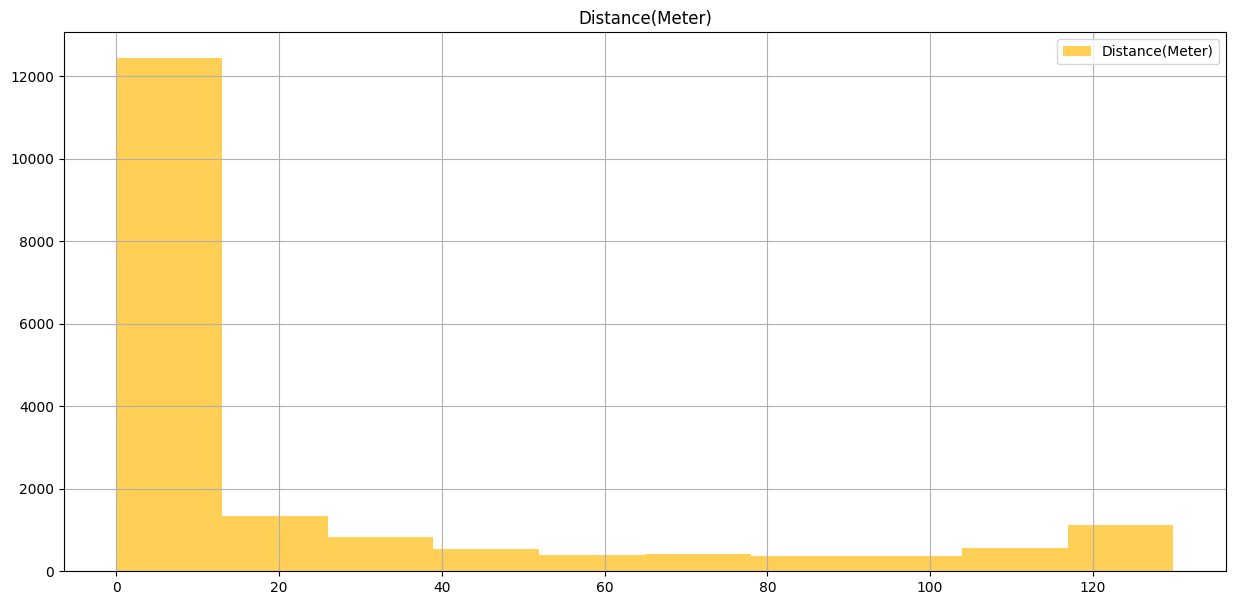

In [37]:
df_temp.hist(column='Distance(Meter)',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

array([[<AxesSubplot:title={'center':'total_day'}>]], dtype=object)

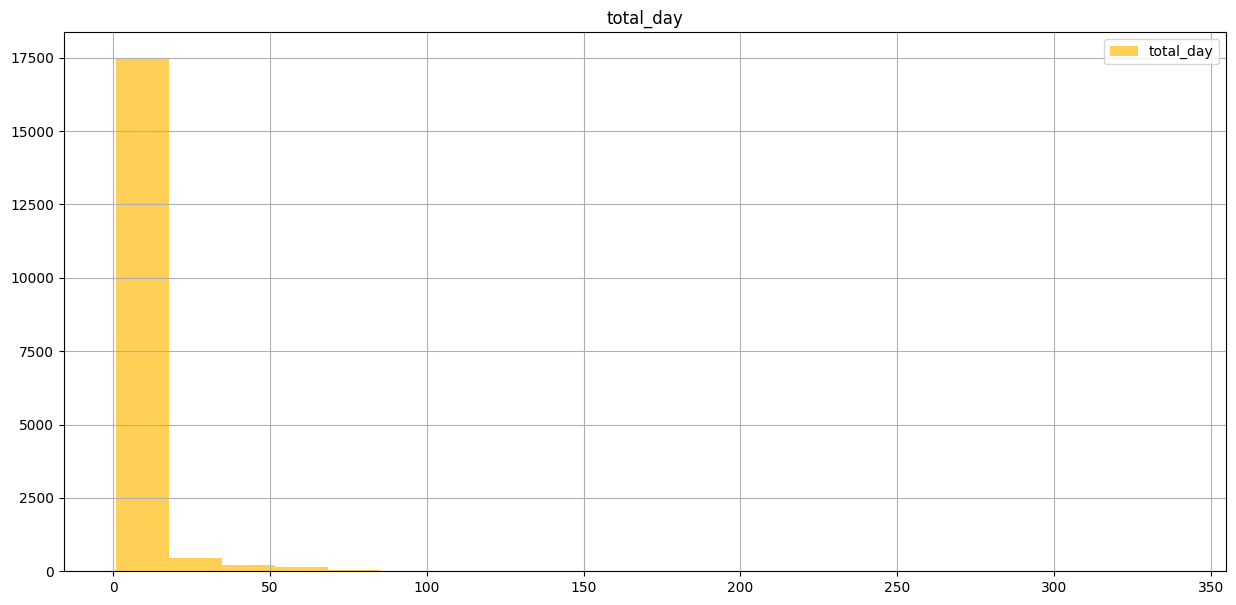

In [38]:
df_temp.hist(column='total_day',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56',
             bins=20)

array([[<AxesSubplot:title={'center':'total_signal'}>]], dtype=object)

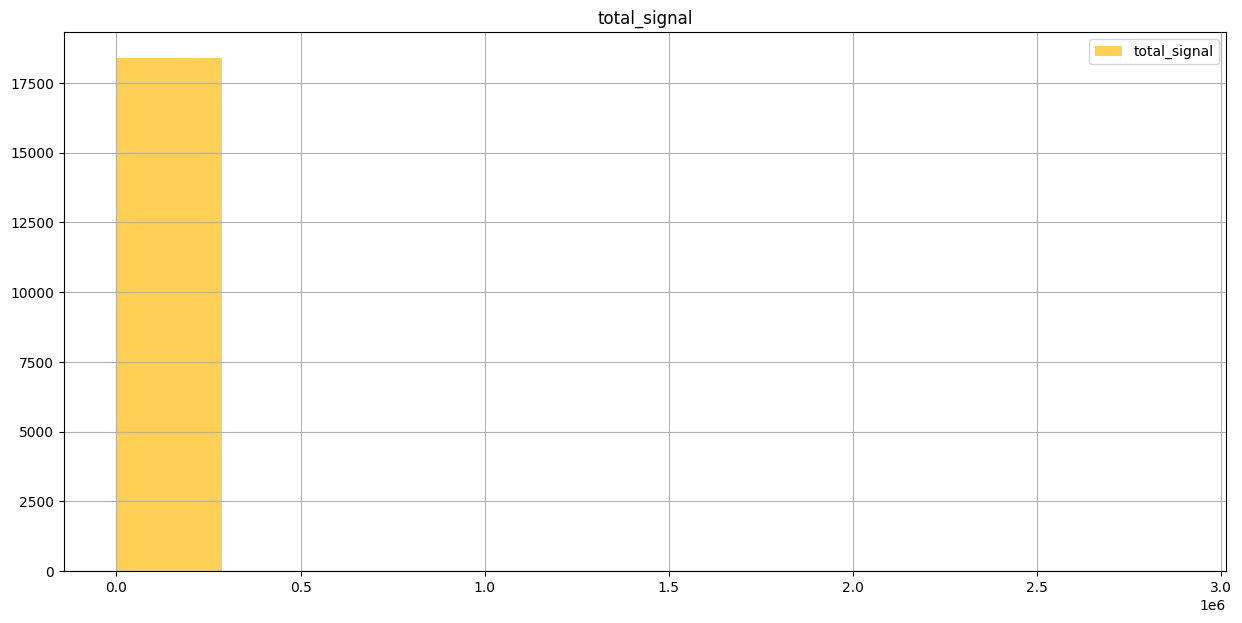

In [39]:
df_temp.hist(column='total_signal',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

In [40]:
df_temp.describe()

,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,avg_time_per_day
count,18412.000000,18412.000000,18412.000000,18412.000000,18412.000000,18412.000000,1.841200e+04,18412.000000,18412.000000,18412.000000
mean,51.460601,51.460508,-0.932596,-0.932771,22.722487,3.590267,3.550463e+03,3.529111,0.061156,0.819020
std,0.000188,0.000149,0.000328,0.000333,38.622542,10.419184,3.784695e+04,9.860053,1.387834,1.982654
min,51.460381,51.460381,-0.933234,-0.933236,0.000000,1.000000,2.000000e+00,0.000000,0.000000,0.000000
25%,51.460447,51.460404,-0.932919,-0.933040,0.000000,1.000000,1.300000e+01,1.000000,0.000000,0.031182
50%,51.460494,51.460442,-0.932475,-0.932836,0.535707,1.000000,1.300000e+01,1.000000,0.000000,0.032497
75%,51.460775,51.460575,-0.932294,-0.932422,26.133281,1.000000,2.500000e+01,1.000000,0.000000,0.123434
max,51.460960,51.460960,-0.932221,-0.932221,129.883520,338.000000,2.869501e+06,242.000000,96.000000,23.683198


## Define the characteristics of Mac ID

Fixed device:
1. Distance < 45 meters
2. Frequency in days >= 5 days / a year
3. Contain data in weekends
4. TODO: Data present whole days
5. TODO: High density: low variance

Mobile device:
1. Distance >= 45 meters 

TODO: 
 - Security guard: 
 1. Night shift
 2. Frequency in days > 5
 3. Contain data in weekend
 - Employee:
 1. Frequency in days > 5
 2. No weekends
 - Visitors:
 1. Frequency in days <= 5
 2. No weekends

In [41]:
# Define the Job function
df_temp['Mobile_or_fixed'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<5, 'Mobile_or_fixed'] = 'Fixed Device'
df_temp

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed
0,00:08:22:00:b9:fb,51.460393,51.460393,-0.932497,-0.932497,0.085973,1,13,1.0,0.0,{working_hour},0.033294,Fixed Device
1,00:08:22:0e:c4:fb,51.460420,51.460420,-0.932617,-0.932617,0.000000,1,2,1.0,0.0,{working_hour},0.026206,Fixed Device
2,00:08:22:12:c5:fb,51.460889,51.460885,-0.932342,-0.932345,0.658860,1,13,1.0,0.0,{working_hour},0.032361,Fixed Device
3,00:08:22:20:bc:fb,51.460448,51.460382,-0.932492,-0.932658,19.917625,1,6,1.0,0.0,{working_hour},0.246120,Mobile Device
4,00:08:22:24:b7:fb,51.460696,51.460633,-0.932276,-0.932314,8.172743,1,11,1.0,0.0,{working_hour},0.028713,Mobile Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18407,fc:d8:48:80:ab:de,51.460513,51.460386,-0.932489,-0.933054,64.369748,2,315,2.0,0.0,{working_hour},0.433865,Mobile Device
18408,fc:db:b3:30:28:c9,51.460430,51.460430,-0.932624,-0.932624,0.000000,1,13,1.0,0.0,{working_hour},0.034020,Fixed Device
18409,fc:db:b3:31:4e:a8,51.460411,51.460411,-0.933036,-0.933036,0.000000,1,13,1.0,0.0,{working_hour},0.031485,Fixed Device
18410,fc:f8:ae:5a:6f:ea,51.460608,51.460410,-0.932323,-0.932448,26.020636,1,321,1.0,0.0,{working_hour},0.933199,Mobile Device


In [42]:
df_temp["Mobile_or_fixed"].value_counts()

Fixed Device     10892
Mobile Device     7520
Name: Mobile_or_fixed, dtype: int64

In [109]:
#Select fixed device
Fix_device = df_temp[df_temp['Mobile_or_fixed']=='Fixed Device'].sort_values('Distance(Meter)', ascending=False)
Fix_device

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed
7622,80:58:f8:cc:10:67,51.460600,51.460574,-0.932327,-0.932364,4.997148,1,13,1.0,0.0,{working_hour},0.032159,Fixed Device
11691,90:b6:86:d0:92:53,51.460444,51.460423,-0.932642,-0.932681,4.992580,2,14,2.0,0.0,{working_hour},0.016924,Fixed Device
15020,d0:77:14:7f:b9:2c,51.460494,51.460474,-0.933169,-0.933209,4.988431,1,13,1.0,0.0,{working_hour},0.033606,Fixed Device
6838,80:58:f8:70:0f:66,51.460492,51.460448,-0.933030,-0.933038,4.977924,1,13,1.0,0.0,{working_hour},0.033331,Fixed Device
12348,a0:2c:36:50:ea:37,51.460420,51.460414,-0.932979,-0.933023,4.975930,2,14,2.0,0.0,{working_hour},0.016478,Fixed Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7090,80:58:f8:8f:08:de,51.460446,51.460446,-0.932455,-0.932455,0.000000,1,8,1.0,0.0,{working_hour},0.026940,Fixed Device
7091,80:58:f8:8f:0c:f5,51.460457,51.460457,-0.932919,-0.932919,0.000000,1,13,1.0,0.0,{working_hour},0.031844,Fixed Device
7092,80:58:f8:8f:41:2a,51.460890,51.460890,-0.932356,-0.932356,0.000000,1,13,1.0,0.0,{working_hour},0.032074,Fixed Device
7095,80:58:f8:8f:f7:17,51.460491,51.460491,-0.932771,-0.932771,0.000000,1,13,1.0,0.0,{working_hour},0.032710,Fixed Device


In [44]:
Fix_device['total_day'].dtype

dtype('int64')

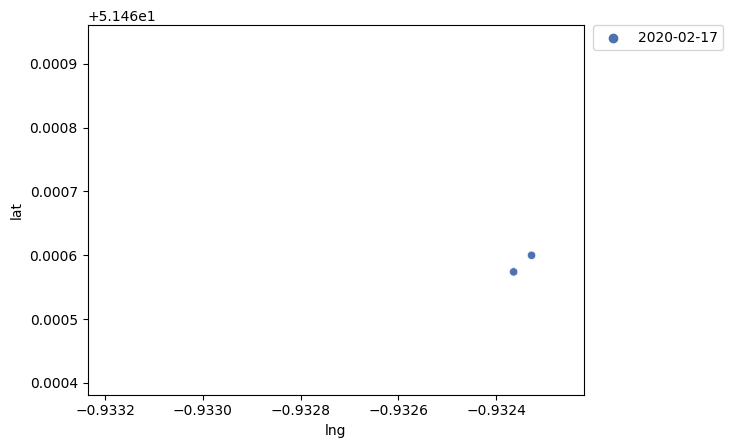

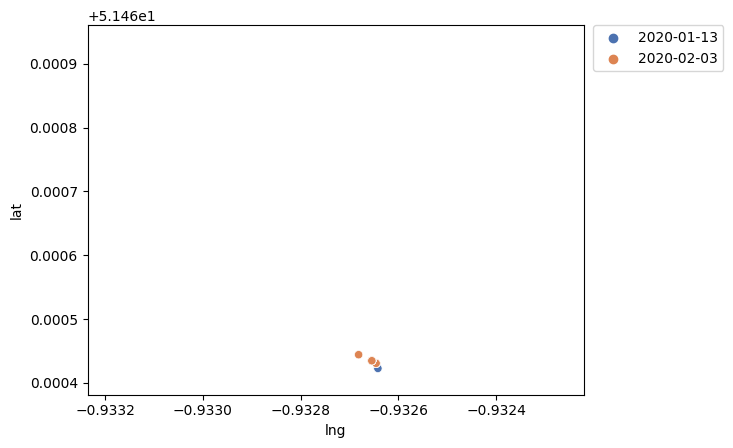

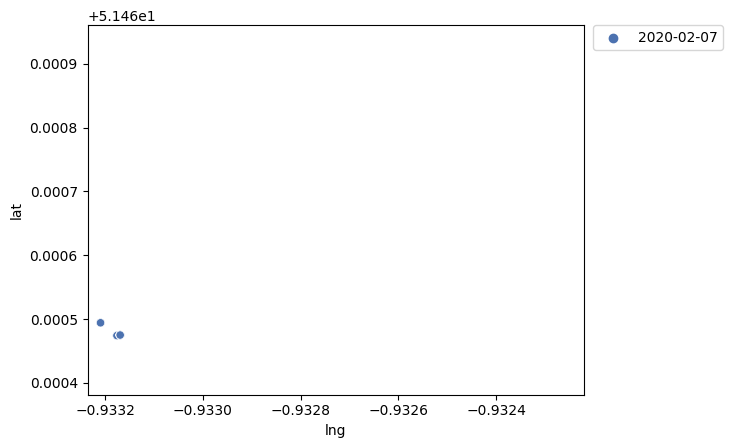

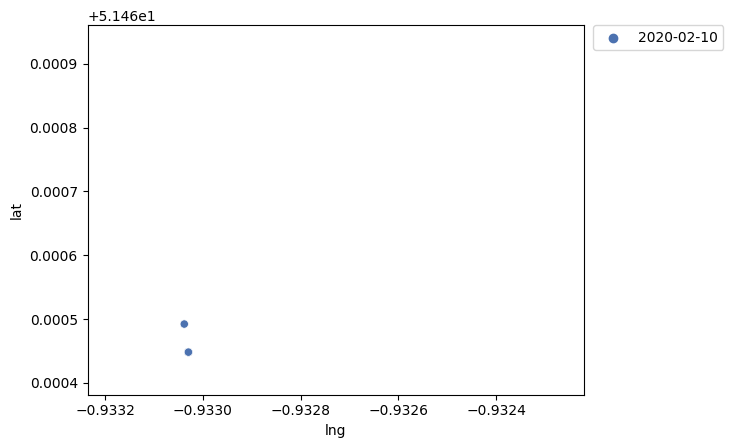

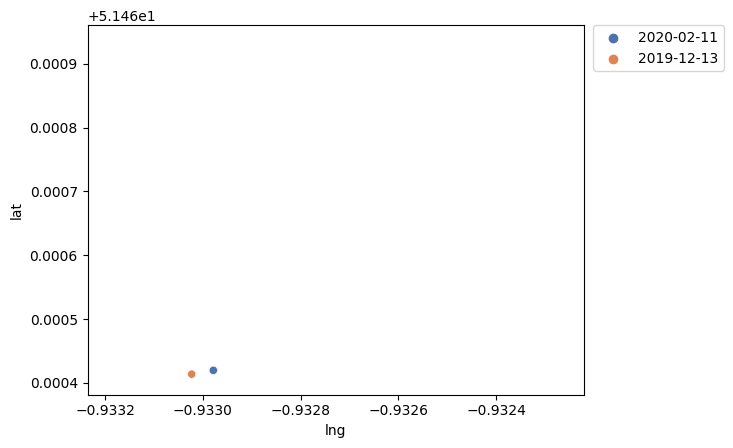

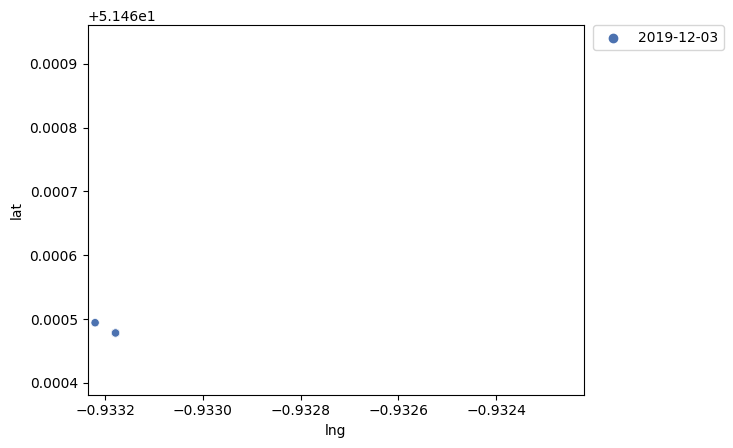

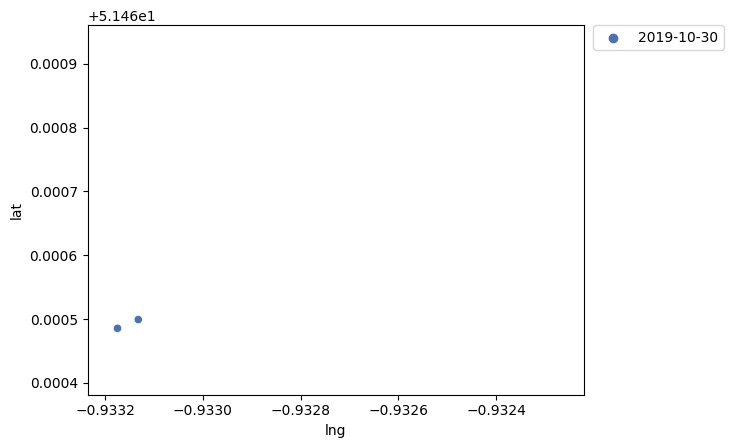

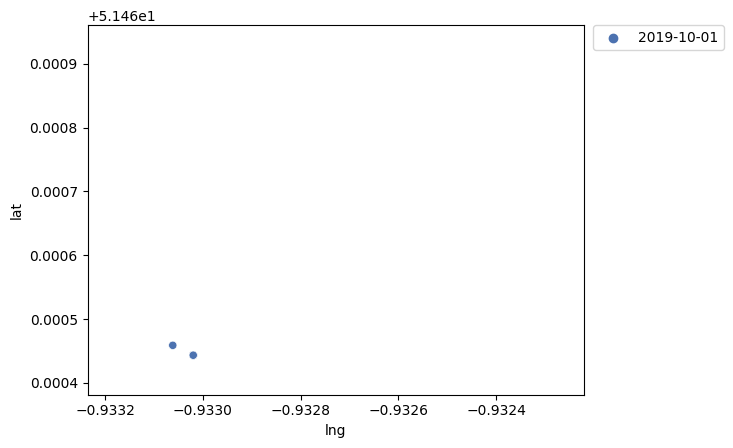

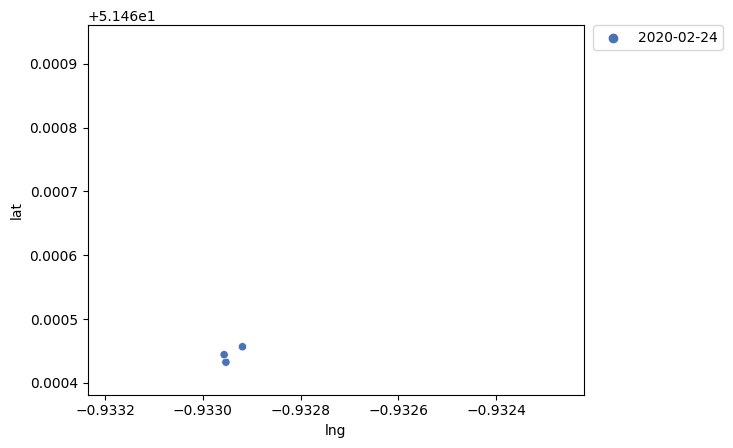

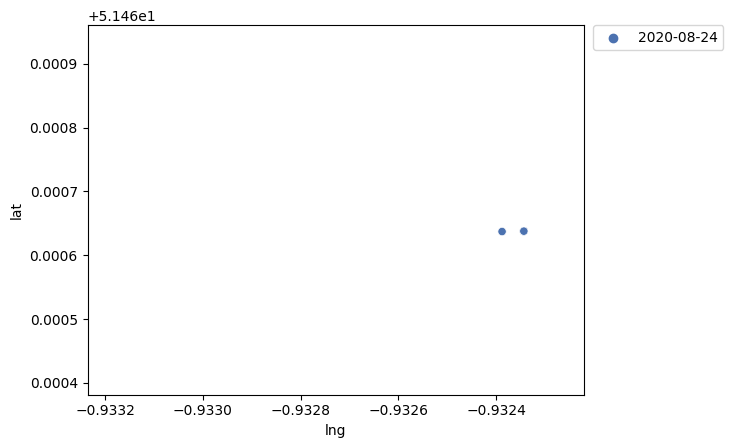

In [45]:
# Assign color for different days
top10_fix = np.array(Fix_device['ClientMacAddr'])[:10]
Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_fix)]

# print(top10_fix)
for i in top10_fix:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [46]:
# Create mobile device df
Mobile_device = df_temp[df_temp['Mobile_or_fixed']=='Mobile Device'].sort_values('Distance(Meter)', ascending=False)
print(Mobile_device.shape)
Mobile_device.head()

(7520, 13)


,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed
13545,cc:73:14:60:68:97,51.46096,51.460381,-0.932221,-0.933236,129.883520,94,167374,94.0,0.0,{working_hour},7.659719,Mobile Device
12890,b4:9c:df:7b:7d:a0,51.46096,51.460381,-0.932221,-0.933236,129.875798,26,41305,26.0,0.0,{working_hour},7.177091,Mobile Device
13065,bc:9f:ef:12:17:ff,51.46096,51.460382,-0.932221,-0.933236,129.873624,74,156147,74.0,0.0,{working_hour},8.550306,Mobile Device
12666,a8:db:03:52:33:06,51.46096,51.460382,-0.932221,-0.933236,129.871349,56,85817,56.0,0.0,{working_hour},6.963287,Mobile Device
4914,5c:5f:67:8b:28:01,51.46096,51.460381,-0.932221,-0.933236,129.864643,64,161339,64.0,0.0,{working_hour},7.954304,Mobile Device


## Filter out mac id that occurs in the designed space

In [47]:
df_office = df.query("lat>=51.46086267643394 and lat<=51.46093167542239")
df_office = df_office.query("lng>=-0.93233819710921 and lng<=-0.9322256859342483")
unique_office_mac = df_office["ClientMacAddr"].unique()
len(unique_office_mac)

1761

In [48]:
# # Select mac id that is mobile, occurs in the designed area, and weekday only
# df_office = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
#                (df['ClientMacAddr'].isin(unique_office_mac)) &
#                (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
# print(len(df_office["ClientMacAddr"].unique()))

# # Pick only 20 mac id
# for i in df_office["ClientMacAddr"].unique()[:20]:
#     print(i)
#     person = df[df['ClientMacAddr'] == i]
#     # Color category by date
#     sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
#     plt.xlim([min_lng, max_lng])
#     plt.ylim([min_lat, max_lat])
#     plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#     plt.show()

In [49]:
# # Plot the category color by level, not date
# for i in df_office["ClientMacAddr"].unique()[:20]:
#     person = df[df['ClientMacAddr'] == i]
#     sns.scatterplot(x="lng", y="lat", data=person, hue="Level", palette="deep")
#     plt.xlim([min_lng, max_lng])
#     plt.ylim([min_lat, max_lat])
#     plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#     plt.show()

In [50]:
# bottom_left_it_office = 51.460829310334326, -0.9325432832801082
# top_right_it_office   = 51.46095700368193, -0.9322479152569846

# bottom_left_engineer_room = 51.46062086895524, -0.9325704089148847
# top_right_engineer_room   = 51.460739173638565, -0.9322961386076987

# bottom_left_entrance = 51.46039535635214, -0.9325788352265879
# top_right_entrance = 51.46050255994146, -0.9323193329736676

# bottom_left_canteen = 51.46042877285531, -0.9332653621565505
# top_right_canteen = 51.46048718462074, -0.9328699790307564

# bottom_left_conference_rooms = 51.46053543776189, -0.9332449815830561
# top_right_conference_rooms = 51.46056005640908, -0.9327219498297091

## Count number of signals that belong to designated areas

In [51]:
## Select only 2nd floor, mobile mac id, and weekday data
df_mobile = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['Level'].isin(["2nd Floor"])) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
df_mobile

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session
9502669,UK Office,2nd Floor,9c:8c:6e:46:01:f8,51.460444,-0.932935,2020-06-10 12:51:24.704000+00:00,2020-06-10 12:51:24.704000+00:00,2020-06-10,12,2,False,working_hour
9502670,UK Office,2nd Floor,9c:8c:6e:46:01:f8,51.460444,-0.932935,2020-06-10 12:51:19.490000+00:00,2020-06-10 12:51:19.490000+00:00,2020-06-10,12,2,False,working_hour
9502671,UK Office,2nd Floor,9c:8c:6e:46:01:f8,51.460444,-0.932935,2020-06-10 12:51:09.136000+00:00,2020-06-10 12:51:09.136000+00:00,2020-06-10,12,2,False,working_hour
9502672,UK Office,2nd Floor,9c:8c:6e:46:01:f8,51.460444,-0.932935,2020-06-10 12:50:56.894000+00:00,2020-06-10 12:50:56.894000+00:00,2020-06-10,12,2,False,working_hour
9502673,UK Office,2nd Floor,9c:8c:6e:46:01:f8,51.460444,-0.932935,2020-06-10 12:50:48.849000+00:00,2020-06-10 12:50:48.849000+00:00,2020-06-10,12,2,False,working_hour
...,...,...,...,...,...,...,...,...,...,...,...,...
64186028,UK Office,2nd Floor,a4:c3:f0:a5:f1:22,51.460607,-0.932337,2019-11-11 13:40:48.695000+00:00,2019-11-11 13:40:48.695000+00:00,2019-11-11,13,0,False,working_hour
64186029,UK Office,2nd Floor,a4:c3:f0:a1:fa:b8,51.460657,-0.932339,2019-11-11 13:40:48.695000+00:00,2019-11-11 13:40:48.695000+00:00,2019-11-11,13,0,False,working_hour
64186030,UK Office,2nd Floor,e4:a7:a0:94:2e:7e,51.460575,-0.932283,2019-11-11 13:40:48.695000+00:00,2019-11-11 13:40:48.695000+00:00,2019-11-11,13,0,False,working_hour
64186031,UK Office,2nd Floor,5c:f7:e6:e7:63:b0,51.460900,-0.932418,2019-11-11 13:40:48.296000+00:00,2019-11-11 13:40:48.296000+00:00,2019-11-11,13,0,False,working_hour


In [52]:
df_mobile['Level'].unique()

array(['2nd Floor'], dtype=object)

In [53]:
df_mobile = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['Level'].isin(["2nd Floor"])) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]

In [54]:
len(df_mobile['ClientMacAddr'].unique())

2862

In [55]:
len(Mobile_device['ClientMacAddr'].unique())

7520

In [56]:
def find_designated_space(lat, lng):
    bottom_left_it_office = (51.46079754688419, -0.932543300159931)
    top_right_it_office   = (51.46098040420442, -0.9322317891150113)

    bottom_left_engineer_room = (51.46053965077327, -0.9325912535330138)
    top_right_engineer_room   = (51.46076277798453, -0.9322830982136779)

    bottom_left_entrance = (51.46030604220702, -0.932772184478665)
    top_right_entrance = (51.46042969133505, -0.9325039535328952)
    
    bottom_left_canteen = (51.46037535823833, -0.933292264577848)
    top_right_canteen = (51.46045878152074, -0.9327547136518658)

    bottom_left_conference_rooms = (51.460503615959965, -0.9332691578318232)
    top_right_conference_rooms = (51.46056710279871, -0.9325986479131928)
    
    bottom_left_training_center = (51.460381264360485, -0.9324809291429241)
    top_right_training_center = (51.46050660159573, -0.9323173144061498)

    
    if lat >= bottom_left_it_office[0] and lat <= top_right_it_office[0] and lng >= bottom_left_it_office[1] and lng <= top_right_it_office[1]:
        designated_space = 'it_office'
    elif lat >= bottom_left_engineer_room[0] and lat <= top_right_engineer_room[0] and lng >= bottom_left_engineer_room[1] and lng <= top_right_engineer_room[1]:
        designated_space = 'engineering_room'
    elif lat >= bottom_left_entrance[0] and lat <= top_right_entrance[0] and lng >= bottom_left_entrance[1] and lng <= top_right_entrance[1]:
        designated_space = 'entrance'
    elif lat >= bottom_left_canteen[0] and lat <= top_right_canteen[0] and lng >= bottom_left_canteen[1] and lng <= top_right_canteen[1]:
        designated_space = 'canteen'
    elif lat >= bottom_left_conference_rooms[0] and lat <= top_right_conference_rooms[0] and lng >= bottom_left_conference_rooms[1] and lng <= top_right_conference_rooms[1]:
        designated_space = 'conference'
    elif lat >= bottom_left_training_center[0] and lat <= top_right_training_center[0] and lng >= bottom_left_training_center[1] and lng <= top_right_training_center[1]:
        designated_space = 'training_center'
    else:
        designated_space = 'not_in_any'
    
    return designated_space

In [57]:
df_mobile['designated_space'] = df_mobile.apply(lambda x: find_designated_space(x['lat'], x['lng']), axis=1)
df_mobile['designated_space'].value_counts()

/var/folders/_j/h7l14zmj2nj1q591lbmhszpm0000gn/T/ipykernel_24199/2016001482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile['designated_space'] = df_mobile.apply(lambda x: find_designated_space(x['lat'], x['lng']), axis=1)


engineering_room    4251233
canteen             3053523
it_office           1901793
not_in_any          1728240
entrance            1269873
training_center      178618
conference            10124
Name: designated_space, dtype: int64

In [58]:
len(df_mobile['ClientMacAddr'].unique())

2862

In [59]:
######### I modified below parts ############

In [60]:
def choose_max_space(row):
    space_dict = {'canteen': row[2], 'conference': row[3], 'engineering_room': row[4],
                  'entrance': row[5], 'it_office': row[6], 'not_in_any':row[7],
                  'training_center': row[8]}
    max_area_spending = list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).keys())
    max_time_spending = list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).values())
    if max_time_spending[0] < 0.3:
#         print(max_time_spending)
        return 'security_guard'
    else:
        return max_area_spending[0]

In [61]:
df_mobile_space = df_mobile.groupby('ClientMacAddr')['designated_space'].value_counts(normalize=True).unstack().reset_index(drop=False).fillna(0)
print(df_mobile_space.columns)
#df_mobile_space = pd.merge(df_mobile_space, max_space_df, how='left', on = 'ClientMacAddr')
df_mobile_space["max_space"] = [choose_max_space(row) for row in df_mobile_space.itertuples()]
df_mobile_space.tail()

Index(['ClientMacAddr', 'canteen', 'conference', 'engineering_room',
       'entrance', 'it_office', 'not_in_any', 'training_center'],
      dtype='object', name='designated_space')


designated_space,ClientMacAddr,canteen,conference,engineering_room,entrance,it_office,not_in_any,training_center,max_space
2857,fc:62:b9:37:f1:b3,0.0,0.000000,0.333333,0.000000,0.666667,0.000000,0.0,it_office
2858,fc:62:b9:9b:1e:2f,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,it_office
2859,fc:62:b9:ea:b4:b6,0.0,0.923077,0.000000,0.000000,0.000000,0.076923,0.0,conference
2860,fc:65:de:55:82:70,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,it_office
2861,fc:94:35:23:ee:a5,0.0,0.479339,0.000000,0.512397,0.000000,0.008264,0.0,entrance


In [62]:
df_mobile_space['max_space'].value_counts()

canteen             913
engineering_room    761
not_in_any          604
it_office           262
entrance            249
training_center      32
security_guard       22
conference           19
Name: max_space, dtype: int64

00:08:22:24:bd:fb
designated_space
ClientMacAddr       00:08:22:24:bd:fb
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                    entrance
Name: 0, dtype: object


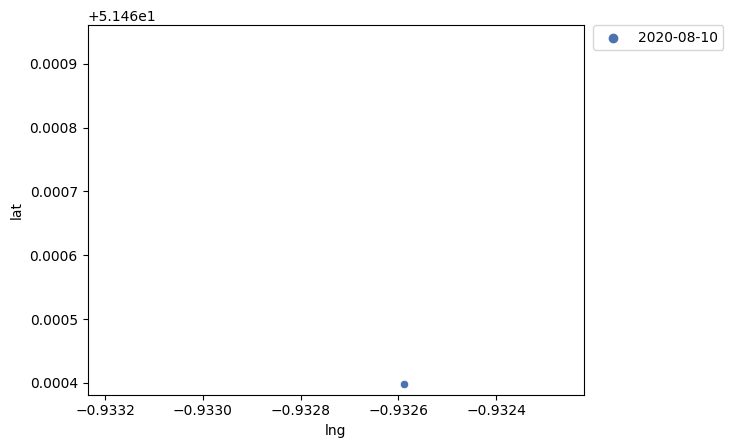

00:08:22:2e:17:fc
designated_space
ClientMacAddr       00:08:22:2e:17:fc
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         1.0
not_in_any                        0.0
training_center                   0.0
max_space                   it_office
Name: 1, dtype: object


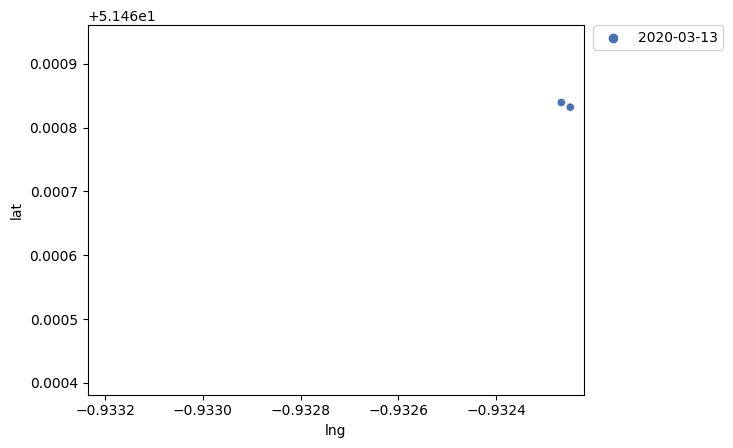

00:08:22:38:c2:fb
designated_space
ClientMacAddr       00:08:22:38:c2:fb
canteen                           0.0
conference                        0.0
engineering_room                  1.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space            engineering_room
Name: 2, dtype: object


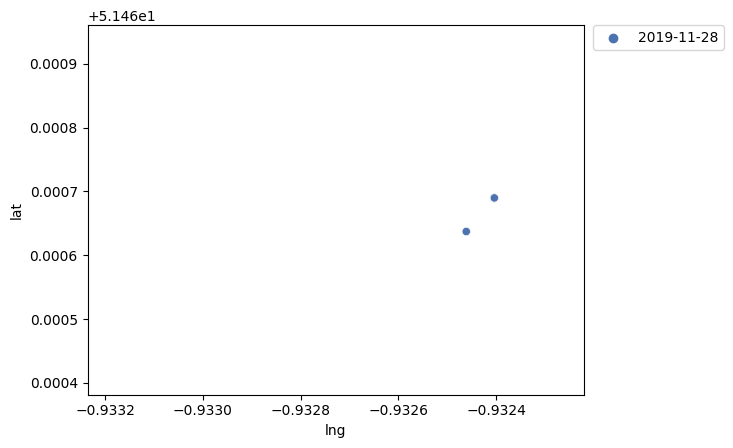

00:08:22:4c:f9:cd
designated_space
ClientMacAddr       00:08:22:4c:f9:cd
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.5
not_in_any                        0.5
training_center                   0.0
max_space                   it_office
Name: 3, dtype: object


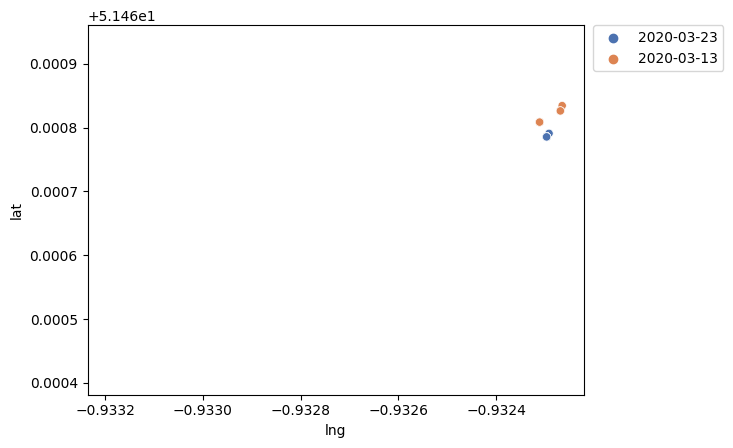

00:08:22:e0:ba:fb
designated_space
ClientMacAddr       00:08:22:e0:ba:fb
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                    entrance
Name: 4, dtype: object


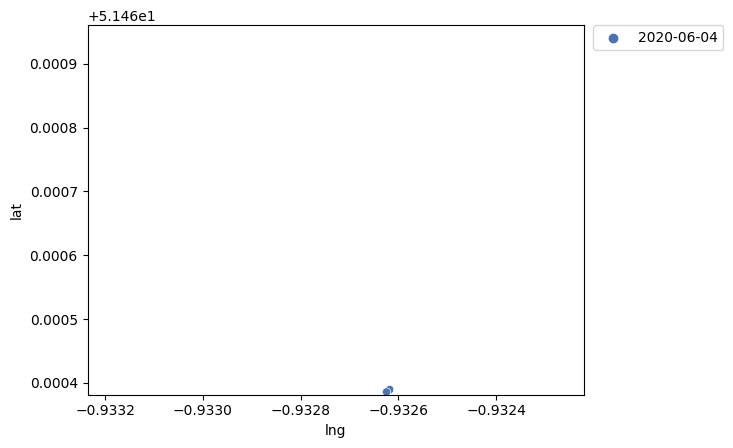

00:0b:82:d0:ff:35
designated_space
ClientMacAddr       00:0b:82:d0:ff:35
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                        0.625
it_office                         0.0
not_in_any                      0.375
training_center                   0.0
max_space                    entrance
Name: 5, dtype: object


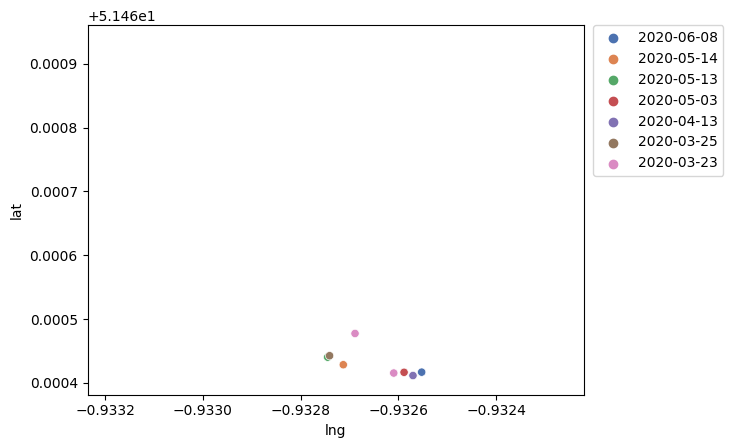

00:0c:e7:11:bf:cb
designated_space
ClientMacAddr       00:0c:e7:11:bf:cb
canteen                      0.923077
conference                        0.0
engineering_room                  0.0
entrance                     0.076923
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                     canteen
Name: 6, dtype: object


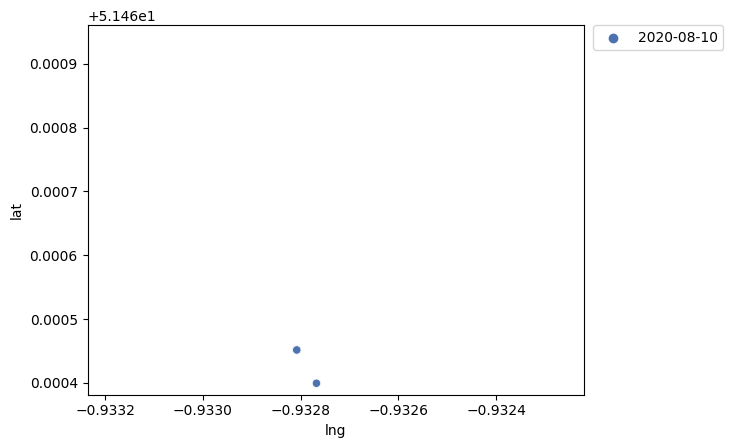

00:0c:e7:24:9c:29
designated_space
ClientMacAddr       00:0c:e7:24:9c:29
canteen                           1.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                     canteen
Name: 7, dtype: object


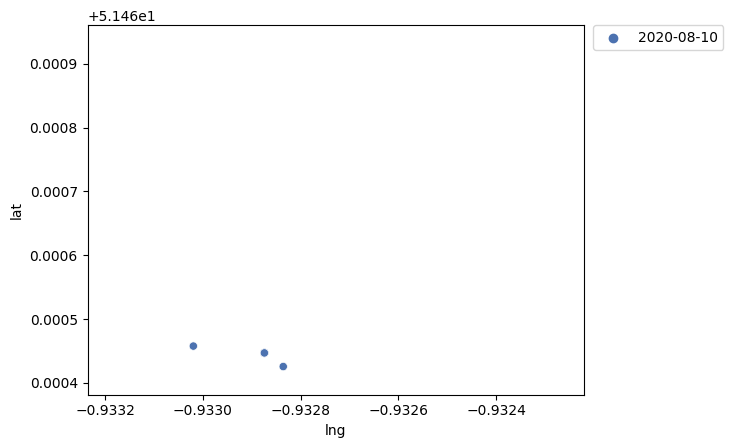

00:0c:e7:8d:79:f0
designated_space
ClientMacAddr       00:0c:e7:8d:79:f0
canteen                           0.0
conference                        0.0
engineering_room                  1.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space            engineering_room
Name: 8, dtype: object


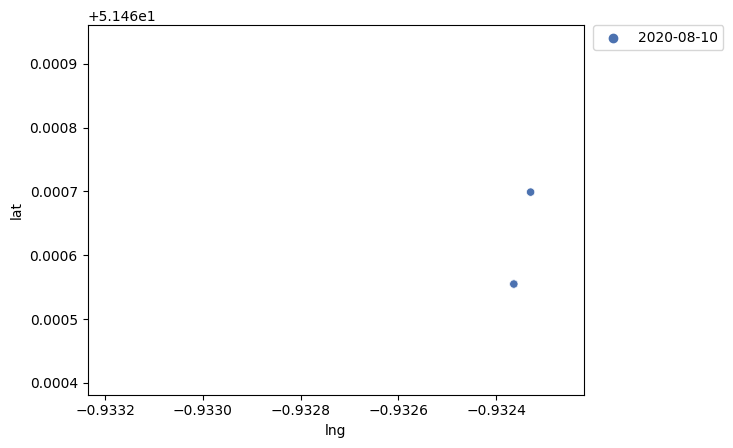

00:0c:e7:90:26:50
designated_space
ClientMacAddr       00:0c:e7:90:26:50
canteen                           0.0
conference                        0.0
engineering_room             0.923077
entrance                          0.0
it_office                         0.0
not_in_any                   0.076923
training_center                   0.0
max_space            engineering_room
Name: 9, dtype: object


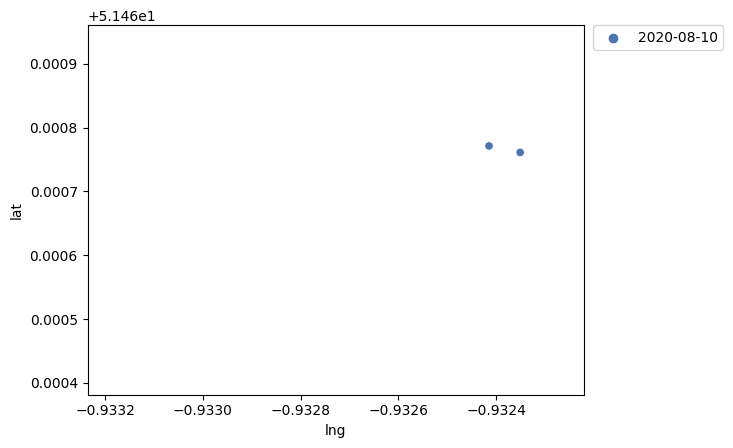

In [63]:
## plot the data with associated space
ind = 0
for i in df_mobile_space["ClientMacAddr"].unique()[:10]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    print(df_mobile_space.loc[ind,:])
    ind += 1
    # plot machinary colored by date
    data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [64]:
df_mobile_space.head()

designated_space,ClientMacAddr,canteen,conference,engineering_room,entrance,it_office,not_in_any,training_center,max_space
0,00:08:22:24:bd:fb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,entrance
1,00:08:22:2e:17:fc,0.0,0.0,0.0,0.0,1.0,0.0,0.0,it_office
2,00:08:22:38:c2:fb,0.0,0.0,1.0,0.0,0.0,0.0,0.0,engineering_room
3,00:08:22:4c:f9:cd,0.0,0.0,0.0,0.0,0.5,0.5,0.0,it_office
4,00:08:22:e0:ba:fb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,entrance


# Mobile device
## For 1st floor: (only weekday)
- "canteen":"canteen_worker",\
  "admin_office":"engineer", ## TODO: Change?\
  "assembly_line":"operator",\
  "entrance":"security_guard",\
  "control_rooms": "operator",\
  "lab": "researcher",\
  "storage": "storage worker",\
  "not_in_any": "visitor"
  
## For 2nd floor: (only weekday)
- Canteen workers  --> canteen && 2nd floor
- Engineers --> engineering_room && 2nd floor only
- IT Technicians --> it_office && 2nd floor only 
- Visitors --> come less than 5 days && spend most time at conference rooms and training center && weekday
- Intruders --> come at night only (between 10 PM. - 5 am.) both weekday and weekend and presence time at night < 2 hrs && present day < 2
- Security Guards --> stay mostly at the entrance || presence time >= 2 hrs for night shift both weekday and weekend || no specific place to stay (max_designated_space_percentage < 0.3)
- Machine Operators --> close to the machines/ 1st floor layout
- Vehicles --> move around the machines

## Fixed device
- Machinery --> 1st floor && Meters < 5m && occurence of days > 5 days
- Printers --> 2nd floor && Meters < 5m && occurence of days > 5 days


## TODO
- How to classify a mac id shows up both floors? --> Choose floor based on maximum time spending

In [65]:
# Create new column using dictionary
designated_space_mapping_dict = { 
             "canteen":"canteen_worker",
             "engineering_room":"engineer",
             "it_office":"IT_technician",
             "entrance":"security_guard",
             "conference": "engineer",
             "training_center": "visitor",
             "security_guard": "security_guard",
             "not_in_any": "visitor"
           }
  
# combine this new data with existing DataFrame
df_mobile_space["job_function"] = df_mobile_space["max_space"].map(designated_space_mapping_dict)

In [66]:
print(df_mobile_space['job_function'].value_counts(dropna=False))
df_mobile_space

canteen_worker    913
engineer          780
visitor           636
security_guard    271
IT_technician     262
Name: job_function, dtype: int64


designated_space,ClientMacAddr,canteen,conference,engineering_room,entrance,it_office,not_in_any,training_center,max_space,job_function
0,00:08:22:24:bd:fb,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,entrance,security_guard
1,00:08:22:2e:17:fc,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,it_office,IT_technician
2,00:08:22:38:c2:fb,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,engineering_room,engineer
3,00:08:22:4c:f9:cd,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.0,it_office,IT_technician
4,00:08:22:e0:ba:fb,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,entrance,security_guard
...,...,...,...,...,...,...,...,...,...,...
2857,fc:62:b9:37:f1:b3,0.0,0.000000,0.333333,0.000000,0.666667,0.000000,0.0,it_office,IT_technician
2858,fc:62:b9:9b:1e:2f,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,it_office,IT_technician
2859,fc:62:b9:ea:b4:b6,0.0,0.923077,0.000000,0.000000,0.000000,0.076923,0.0,conference,engineer
2860,fc:65:de:55:82:70,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,it_office,IT_technician


In [67]:
df_mobile_space['job_function'].value_counts()

canteen_worker    913
engineer          780
visitor           636
security_guard    271
IT_technician     262
Name: job_function, dtype: int64

In [68]:
print(df_mobile_space['max_space'].value_counts(dropna=False))

canteen             913
engineering_room    761
not_in_any          604
it_office           262
entrance            249
training_center      32
security_guard       22
conference           19
Name: max_space, dtype: int64


In [69]:
print(df_mobile_space['job_function'].value_counts(dropna=False))

canteen_worker    913
engineer          780
visitor           636
security_guard    271
IT_technician     262
Name: job_function, dtype: int64


In [70]:
Mobile_device = Mobile_device.merge(df_mobile_space[['ClientMacAddr','job_function']], on='ClientMacAddr', how='left').fillna("undefined")
Mobile_device.tail(30)

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed,job_function
7490,80:58:f8:1f:3f:5f,51.460438,51.460428,-0.932707,-0.932752,5.103973,1,7,1.0,0.0,{working_hour},0.022556,Mobile Device,undefined
7491,bc:c3:42:a0:62:d9,51.460394,51.460382,-0.932846,-0.932891,5.097449,1,15,1.0,0.0,{working_hour},0.039400,Mobile Device,undefined
7492,d0:77:14:f7:aa:15,51.460491,51.460471,-0.932730,-0.932771,5.093844,1,13,1.0,0.0,{working_hour},0.032266,Mobile Device,undefined
7493,88:b4:a6:31:ac:25,51.460457,51.460443,-0.932979,-0.933023,5.089213,1,13,1.0,0.0,{working_hour},0.032311,Mobile Device,canteen_worker
7494,80:58:f8:30:50:70,51.460640,51.460594,-0.932421,-0.932424,5.088244,1,13,1.0,0.0,{working_hour},0.030940,Mobile Device,undefined
7495,d0:77:14:df:d3:a0,51.460426,51.460420,-0.932572,-0.932617,5.087760,1,12,1.0,0.0,{working_hour},0.501393,Mobile Device,undefined
7496,88:b4:a6:52:96:11,51.460418,51.460416,-0.933092,-0.933138,5.077581,1,13,1.0,0.0,{working_hour},0.031843,Mobile Device,canteen_worker
7497,80:58:f8:d0:f0:10,51.460715,51.460684,-0.932226,-0.932259,5.077203,1,13,1.0,0.0,{working_hour},0.033111,Mobile Device,undefined
7498,00:e1:8c:d6:86:7f,51.460396,51.460384,-0.932567,-0.932611,5.073961,1,30,1.0,0.0,{working_hour},0.194686,Mobile Device,security_guard
7499,80:58:f8:6f:0e:2e,51.460420,51.460406,-0.932574,-0.932617,5.069276,2,23,2.0,0.0,{working_hour},0.031460,Mobile Device,undefined


In [71]:
# Identify intruders and security guards based on following logic
def is_intruder(row):
    if row['job_function'] == 'undefined':
        session = list(row['set'])
        # If this mac address comes at night and spend less than 2 hours, we would say it is intruders
        if len(session) < 2 and 'night_time' in session:
            if row['avg_time_per_day'] < 2 and row['total_day'] < 2: 
                return 'intruder'
            elif row['avg_time_per_day'] >= 2: 
                return 'security_guard'
            else:
                return 'undefined'
        else:
            return 'undefined'
    else:
        return row['job_function']

Mobile_device['job_function'] = Mobile_device.apply(is_intruder, axis=1)

In [72]:
Mobile_device['job_function'].value_counts(dropna=False)

undefined         4655
canteen_worker     913
engineer           780
visitor            636
security_guard     271
IT_technician      262
intruder             3
Name: job_function, dtype: int64

In [73]:
Mobile_device[Mobile_device['job_function']=='intruder']

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed,job_function
2536,40:83:de:61:09:1d,51.460480,51.460411,-0.932357,-0.933020,74.116909,1,4,1.0,0.0,{night_time},0.076511,Mobile Device,intruder
2712,40:83:de:61:68:92,51.460479,51.460391,-0.932384,-0.932998,68.894020,1,4,1.0,0.0,{night_time},0.027262,Mobile Device,intruder
5079,30:07:4d:28:69:39,51.460469,51.460402,-0.932635,-0.932809,20.717940,1,39,1.0,0.0,{night_time},0.111517,Mobile Device,intruder


In [74]:
df_mobile_space.head()

designated_space,ClientMacAddr,canteen,conference,engineering_room,entrance,it_office,not_in_any,training_center,max_space,job_function
0,00:08:22:24:bd:fb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,entrance,security_guard
1,00:08:22:2e:17:fc,0.0,0.0,0.0,0.0,1.0,0.0,0.0,it_office,IT_technician
2,00:08:22:38:c2:fb,0.0,0.0,1.0,0.0,0.0,0.0,0.0,engineering_room,engineer
3,00:08:22:4c:f9:cd,0.0,0.0,0.0,0.0,0.5,0.5,0.0,it_office,IT_technician
4,00:08:22:e0:ba:fb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,entrance,security_guard


In [75]:
df.head()

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session
0,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:49.582000+00:00,2020-09-01 23:58:49.582000+00:00,2020-09-01,23,1,False,night_time
1,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:38.112000+00:00,2020-09-01 23:58:38.112000+00:00,2020-09-01,23,1,False,night_time
2,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460448,-0.933048,2020-09-01 23:58:29.514000+00:00,2020-09-01 23:58:29.514000+00:00,2020-09-01,23,1,False,night_time
3,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:18.046000+00:00,2020-09-01 23:58:18.046000+00:00,2020-09-01,23,1,False,night_time
4,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:09.522000+00:00,2020-09-01 23:58:09.522000+00:00,2020-09-01,23,1,False,night_time


40:83:de:61:09:1d


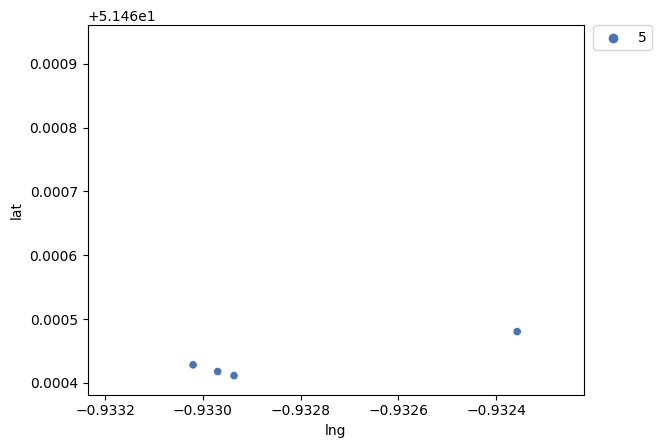

40:83:de:61:68:92


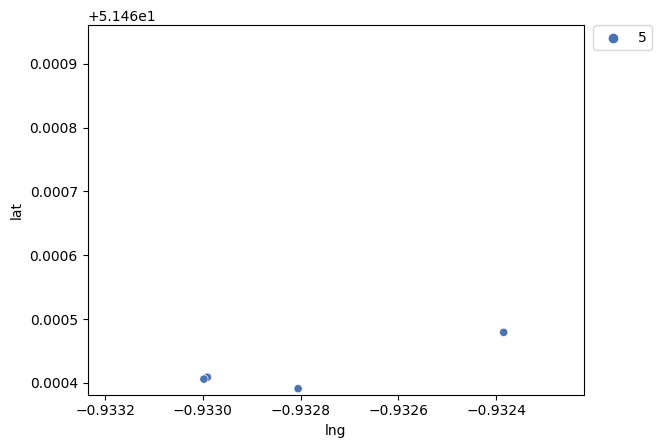

30:07:4d:28:69:39


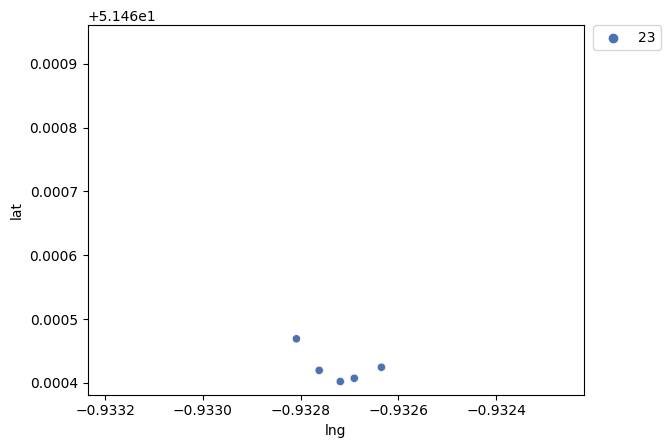

In [76]:
## plot the data with associated space
ind = 0
for i in Mobile_device[Mobile_device['job_function']=='intruder']["ClientMacAddr"][:10]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    #print(df_mobile_space[df_mobile_space['ClientMacAddr'] == i])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[df['ClientMacAddr'] == i]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="hour", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [77]:
############### End of changes #######################

## Count number of signals that belong to designated areas (1st Floor)

In [80]:
def find_designated_space_1F(lat, lng):
    # Canteen
    bottom_left_canteen = (51.46079754688419, -0.932543300159931)
    top_right_canteen   = (51.46098040420442, -0.9322317891150113)
    
    # Lab
    bottom_left_lab = (51.460511289004344, -0.9325966645999756)
    top_right_lab = (51.46076277798453, -0.9322830982136779)
    
    # Entrance
    bottom_left_entrance = (51.46030604220702, -0.932772184478665)
    top_right_entrance = (51.46038783329849, -0.9325170620291541)
    
    # Assembly Line
    bottom_left_assemblyline = (51.46037535823833, -0.933292264577848)
    top_right_assemblyline = (51.46053231597175, -0.9329178977311808)
    
    # Control room
    bottom_left_control_rooms = (51.46036351126477, -0.9329178977311808)
    top_right_control_rooms = (51.4605206006061, -0.9327703787013455)

    # Storage
    bottom_left_storage = (51.46036685171761, -0.932772184478665)
    top_right_storage = (51.460505605290635, -0.9326059032401409)
    
    # Admin office
    bottom_left_admin_office = (51.46035352283357, -0.9325924891387347)
    top_right_admin_office = (51.46047718898315, -0.9323189038465033)
    
    if lat >= bottom_left_canteen[0] and lat <= top_right_canteen[0] and lng >= bottom_left_canteen[1] and lng <= top_right_canteen[1]:
        designated_space = 'canteen'
    elif lat >= bottom_left_lab[0] and lat <= top_right_lab[0] and lng >= bottom_left_lab[1] and lng <= top_right_lab[1]:
        designated_space = 'lab'
    elif lat >= bottom_left_entrance[0] and lat <= top_right_entrance[0] and lng >= bottom_left_entrance[1] and lng <= top_right_entrance[1]:
        designated_space = 'entrance'
    elif lat >= bottom_left_assemblyline[0] and lat <= top_right_assemblyline[0] and lng >= bottom_left_assemblyline[1] and lng <= top_right_assemblyline[1]:
        designated_space = 'assembly_line'
    elif lat >= bottom_left_control_rooms[0] and lat <= top_right_control_rooms[0] and lng >= bottom_left_control_rooms[1] and lng <= top_right_control_rooms[1]:
        designated_space = 'control_rooms'
    elif lat >= bottom_left_storage[0] and lat <= top_right_storage[0] and lng >= bottom_left_storage[1] and lng <= top_right_storage[1]:
        designated_space = 'storage'
    elif lat >= bottom_left_admin_office[0] and lat <= top_right_admin_office[0] and lng >= bottom_left_admin_office[1] and lng <= top_right_admin_office[1]:
        designated_space = 'admin_office'
    else:
        designated_space = 'not_in_any'
    
    return designated_space

### Mobile Device

In [81]:
Mobile_device_1F = Mobile_device[Mobile_device['job_function']=='undefined']
print(len(Mobile_device_1F['ClientMacAddr'].unique()))
# print(len(Mobile_device_1F[Mobile_device_1F['Weekend']==0]['ClientMacAddr'].unique()))

4655


In [82]:
## Select only 1st floor, mobile mac id, and weekday data
# df_mobile_1F = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
#                (df['Level'].isin(["1st Floor"])) &
#                (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
df_mobile_1F = df[df['ClientMacAddr'].isin(Mobile_device_1F["ClientMacAddr"])]
df_mobile_1F

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session
0,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:49.582000+00:00,2020-09-01 23:58:49.582000+00:00,2020-09-01,23,1,False,night_time
1,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:38.112000+00:00,2020-09-01 23:58:38.112000+00:00,2020-09-01,23,1,False,night_time
2,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460448,-0.933048,2020-09-01 23:58:29.514000+00:00,2020-09-01 23:58:29.514000+00:00,2020-09-01,23,1,False,night_time
3,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:18.046000+00:00,2020-09-01 23:58:18.046000+00:00,2020-09-01,23,1,False,night_time
4,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:09.522000+00:00,2020-09-01 23:58:09.522000+00:00,2020-09-01,23,1,False,night_time
...,...,...,...,...,...,...,...,...,...,...,...,...
65371677,UK Office,1st Floor,14:d1:69:fd:13:4e,51.460951,-0.932291,2019-08-28 11:24:07.174000+00:00,2019-08-28 11:24:07.174000+00:00,2019-08-28,11,2,False,working_hour
65371683,UK Office,1st Floor,cc:44:63:42:3b:b4,51.460670,-0.932399,2019-08-28 11:24:06.869000+00:00,2019-08-28 11:24:06.869000+00:00,2019-08-28,11,2,False,working_hour
65371684,UK Office,1st Floor,48:45:20:37:ca:6c,51.460666,-0.932373,2019-08-28 11:24:06.869000+00:00,2019-08-28 11:24:06.869000+00:00,2019-08-28,11,2,False,working_hour
65371695,UK Office,1st Floor,c4:6e:1f:1b:4f:c0,51.460663,-0.932309,2019-08-28 11:24:06.473000+00:00,2019-08-28 11:24:06.473000+00:00,2019-08-28,11,2,False,working_hour


In [83]:
df_mobile_1F['designated_space'] = df_mobile_1F.apply(lambda x: find_designated_space_1F(x['lat'], x['lng']), axis=1)
df_mobile_1F['designated_space'].value_counts()

/var/folders/_j/h7l14zmj2nj1q591lbmhszpm0000gn/T/ipykernel_24199/1837305553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile_1F['designated_space'] = df_mobile_1F.apply(lambda x: find_designated_space_1F(x['lat'], x['lng']), axis=1)


assembly_line    5202136
not_in_any       4396694
lab              3593308
storage          2181364
control_rooms    1834855
canteen           826111
admin_office      256357
entrance           69629
Name: designated_space, dtype: int64

In [84]:
len(df_mobile_1F['ClientMacAddr'].unique())

4655

In [85]:
def choose_max_space_1F(row):
    space_dict = {'admin_office': row[2], 'assembly_line': row[3], 'canteen': row[4],
                  'control_rooms': row[5], 'entrance': row[6], 'lab':row[7], 
                  'not_in_any':row[8], 'storage':row[9]}
    return list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).keys())[0]

In [86]:
df_mobile_space_1F = df_mobile_1F.groupby('ClientMacAddr')['designated_space'].value_counts(normalize=True).unstack().reset_index(drop=False).fillna(0)
print(df_mobile_space_1F.columns)
df_mobile_space_1F["max_space"] = [choose_max_space_1F(row) for row in df_mobile_space_1F.itertuples()]
df_mobile_space_1F.tail()


Index(['ClientMacAddr', 'admin_office', 'assembly_line', 'canteen',
       'control_rooms', 'entrance', 'lab', 'not_in_any', 'storage'],
      dtype='object', name='designated_space')


designated_space,ClientMacAddr,admin_office,assembly_line,canteen,control_rooms,entrance,lab,not_in_any,storage,max_space
4650,fc:a4:79:ad:0e:71,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.285714,0.000000,lab
4651,fc:a6:67:be:c0:a5,0.034924,0.000000,0.040745,0.001164,0.000000,0.871944,0.051222,0.000000,lab
4652,fc:d8:48:80:ab:de,0.003175,0.415873,0.000000,0.000000,0.174603,0.000000,0.000000,0.406349,assembly_line
4653,fc:f8:ae:5a:6f:ea,0.193146,0.000000,0.000000,0.000000,0.000000,0.803738,0.003115,0.000000,lab
4654,fc:fc:48:36:16:6b,0.000000,0.000000,0.245614,0.000000,0.000000,0.438596,0.315789,0.000000,lab


In [87]:
df_mobile_space_1F['max_space'].value_counts()

assembly_line    1301
lab               775
not_in_any        648
control_rooms     542
storage           495
canteen           448
admin_office      426
entrance           20
Name: max_space, dtype: int64

00:08:22:20:bc:fb
designated_space
ClientMacAddr    00:08:22:20:bc:fb
admin_office              0.666667
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                  0.166667
lab                            0.0
not_in_any                     0.0
storage                   0.166667
max_space             admin_office
Name: 0, dtype: object


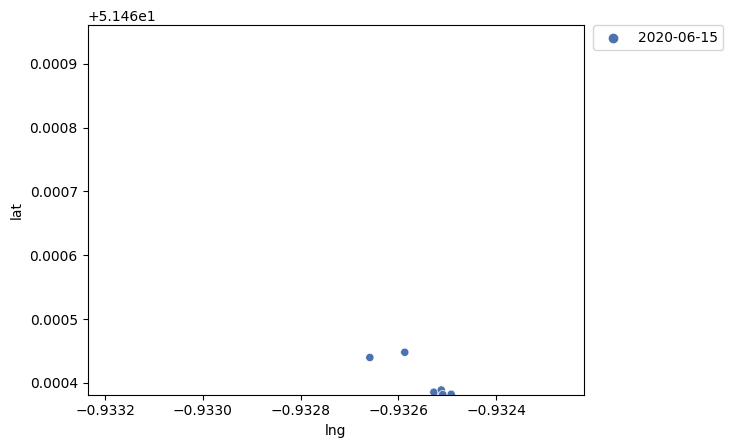

00:08:22:24:b7:fb
designated_space
ClientMacAddr    00:08:22:24:b7:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.909091
not_in_any                0.090909
storage                        0.0
max_space                      lab
Name: 1, dtype: object


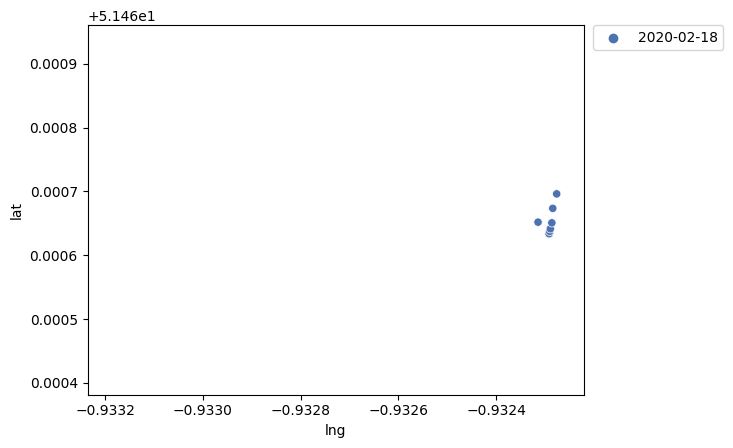

00:08:22:26:bb:fb
designated_space
ClientMacAddr    00:08:22:26:bb:fb
admin_office                   0.5
assembly_line               0.0625
canteen                        0.0
control_rooms                  0.0
entrance                    0.0625
lab                         0.1875
not_in_any                  0.0625
storage                      0.125
max_space             admin_office
Name: 2, dtype: object


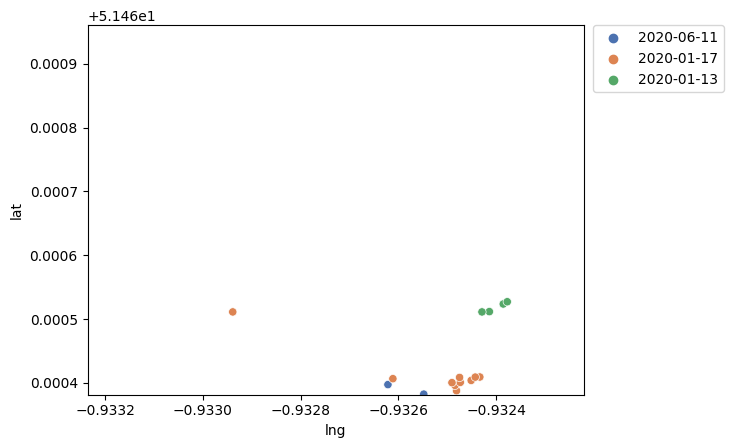

00:08:22:4c:c2:fb
designated_space
ClientMacAddr    00:08:22:4c:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.846154
not_in_any                     0.0
storage                   0.153846
max_space                      lab
Name: 3, dtype: object


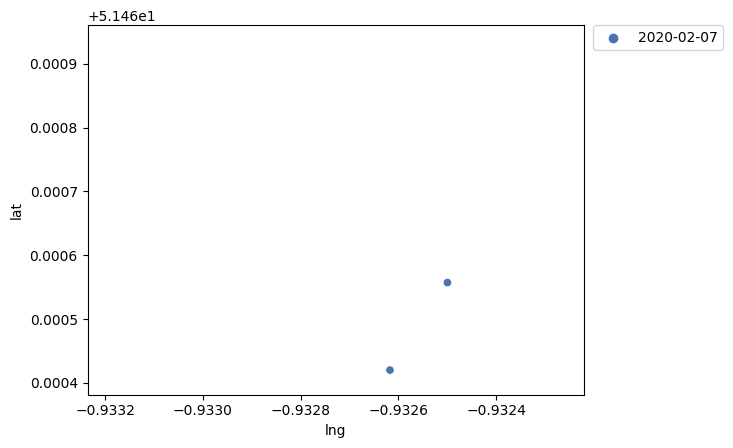

00:08:22:c0:c1:fb
designated_space
ClientMacAddr    00:08:22:c0:c1:fb
admin_office                   0.0
assembly_line                  0.0
canteen                   0.916667
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.083333
storage                        0.0
max_space                  canteen
Name: 4, dtype: object


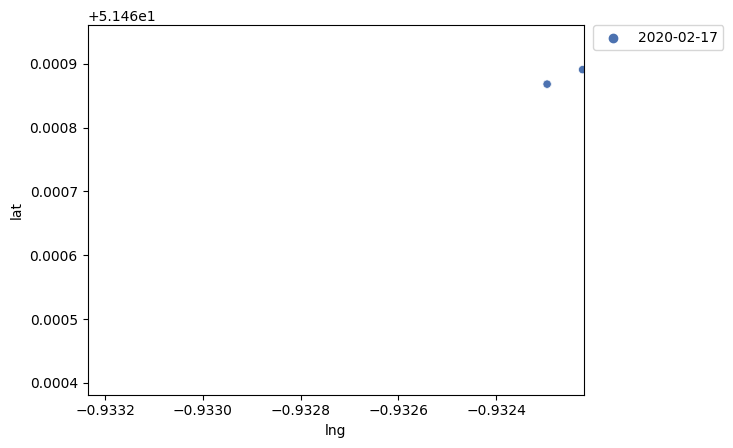

00:08:22:d8:c2:fb
designated_space
ClientMacAddr    00:08:22:d8:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        1.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                     0.0
storage                        0.0
max_space                  canteen
Name: 5, dtype: object


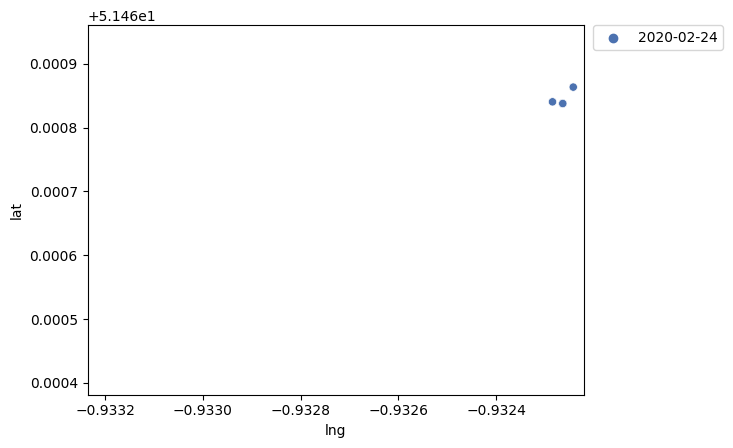

00:08:22:e0:32:fc
designated_space
ClientMacAddr    00:08:22:e0:32:fc
admin_office                   0.0
assembly_line             0.136364
canteen                        0.0
control_rooms                  0.5
entrance                       0.0
lab                            0.0
not_in_any                0.045455
storage                   0.318182
max_space            control_rooms
Name: 6, dtype: object


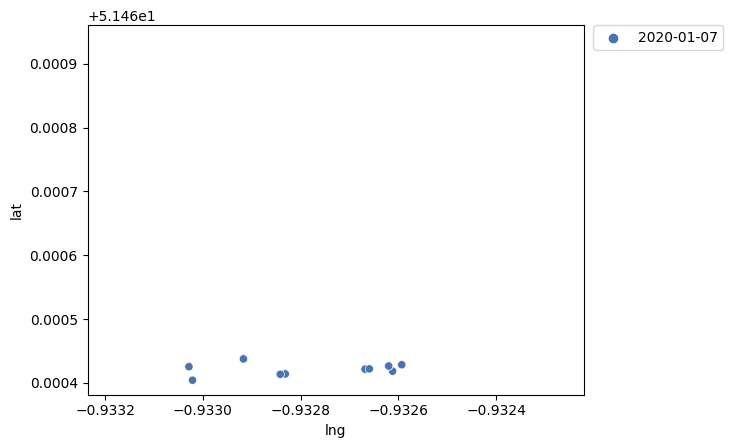

00:0a:f5:40:18:c0
designated_space
ClientMacAddr    00:0a:f5:40:18:c0
admin_office                0.0327
assembly_line             0.527426
canteen                        0.0
control_rooms             0.183544
entrance                   0.07173
lab                       0.092827
not_in_any                 0.00211
storage                   0.089662
max_space            assembly_line
Name: 7, dtype: object


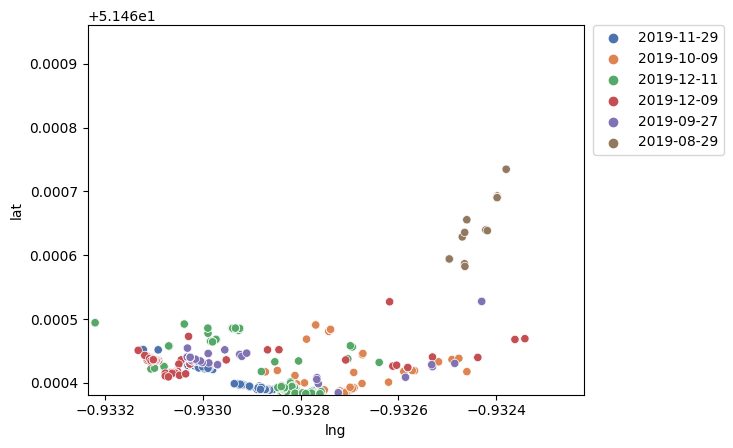

00:0c:e7:02:67:0d
designated_space
ClientMacAddr    00:0c:e7:02:67:0d
admin_office              0.923077
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.076923
storage                        0.0
max_space             admin_office
Name: 8, dtype: object


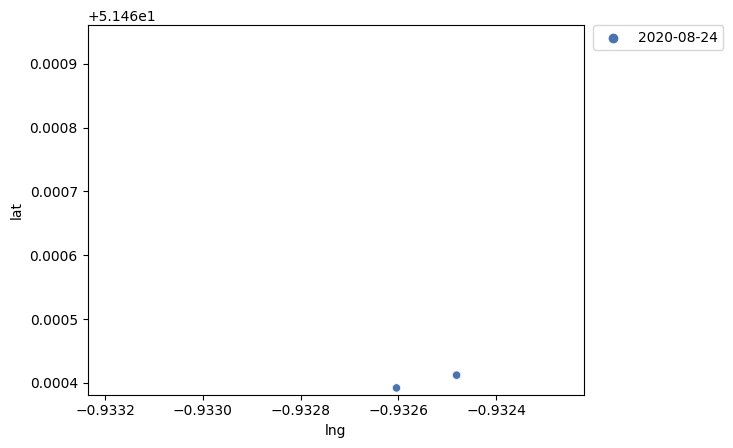

00:0c:e7:02:8b:64
designated_space
ClientMacAddr    00:0c:e7:02:8b:64
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                     1.0
storage                        0.0
max_space               not_in_any
Name: 9, dtype: object


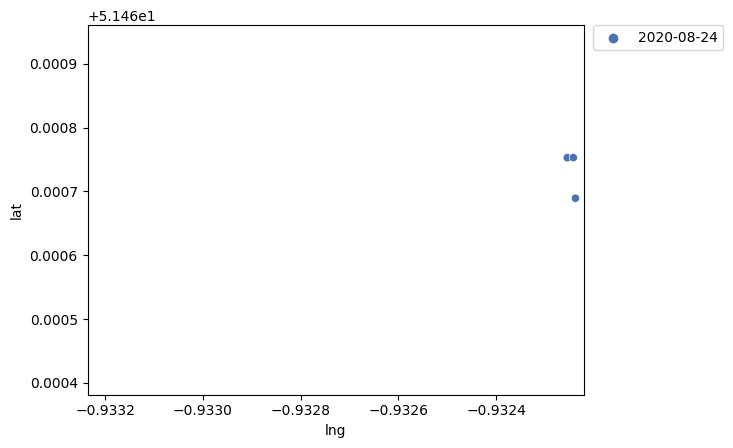

In [88]:
## plot the data with associated space
ind = 0
for i in df_mobile_space_1F["ClientMacAddr"].unique()[:10]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    print(df_mobile_space_1F.loc[ind,:])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[(df['ClientMacAddr'] == i)]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

### Try to find vehicles and operator

In [89]:
vehicle_or_operator = df_mobile_space_1F[df_mobile_space_1F['max_space'] == 'assembly_line']
vehicle_or_operator

designated_space,ClientMacAddr,admin_office,assembly_line,canteen,control_rooms,entrance,lab,not_in_any,storage,max_space
7,00:0a:f5:40:18:c0,0.032700,0.527426,0.00000,0.183544,0.071730,0.092827,0.002110,0.089662,assembly_line
11,00:0c:e7:09:cd:29,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,assembly_line
35,00:0c:e7:3d:4b:00,0.000000,0.857143,0.00000,0.000000,0.071429,0.000000,0.000000,0.071429,assembly_line
70,00:0c:e7:84:aa:b1,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,assembly_line
99,00:0c:e7:c9:db:14,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,assembly_line
...,...,...,...,...,...,...,...,...,...,...
4639,fc:45:96:c6:da:f5,0.000000,0.458078,0.03681,0.018405,0.002045,0.042945,0.435583,0.006135,assembly_line
4641,fc:62:b9:70:33:fa,0.000000,0.970588,0.00000,0.029412,0.000000,0.000000,0.000000,0.000000,assembly_line
4642,fc:62:b9:70:e2:a5,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,assembly_line
4644,fc:62:b9:b9:4b:1b,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,assembly_line


                                  7
designated_space                   
ClientMacAddr     00:0a:f5:40:18:c0
admin_office                 0.0327
assembly_line              0.527426
canteen                         0.0
control_rooms              0.183544
entrance                    0.07173
lab                        0.092827
not_in_any                  0.00211
storage                    0.089662
max_space             assembly_line


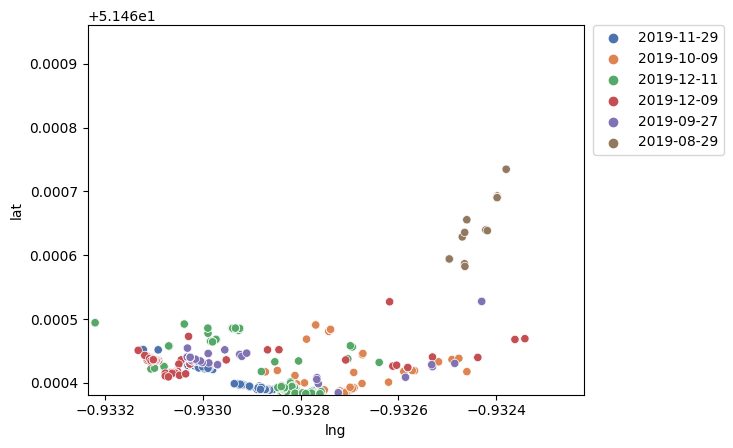

                                 11
designated_space                   
ClientMacAddr     00:0c:e7:09:cd:29
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


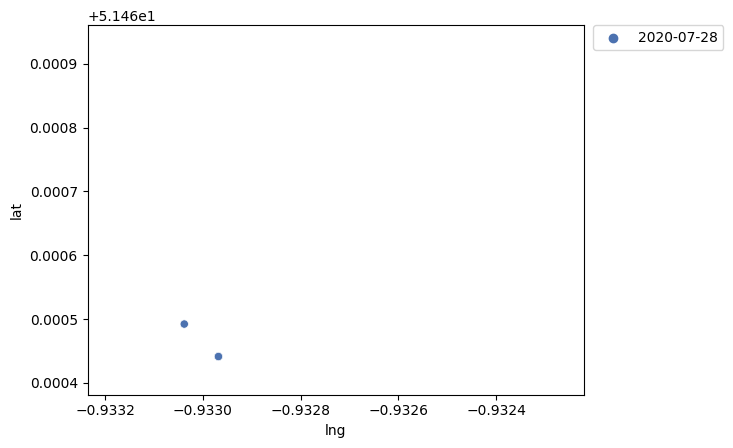

                                 35
designated_space                   
ClientMacAddr     00:0c:e7:3d:4b:00
admin_office                    0.0
assembly_line              0.857143
canteen                         0.0
control_rooms                   0.0
entrance                   0.071429
lab                             0.0
not_in_any                      0.0
storage                    0.071429
max_space             assembly_line


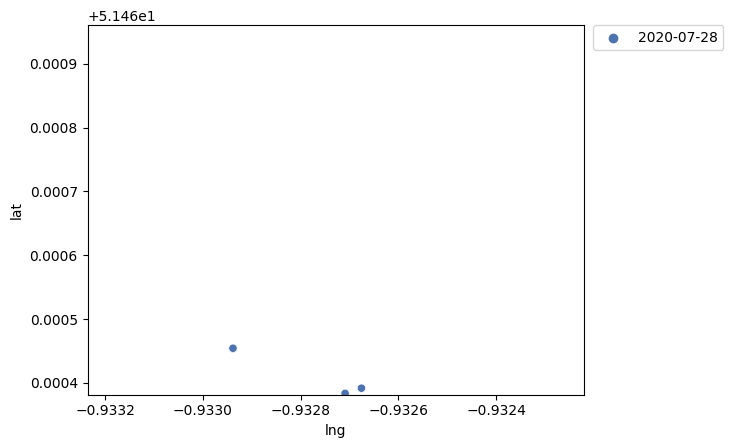

                                 70
designated_space                   
ClientMacAddr     00:0c:e7:84:aa:b1
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


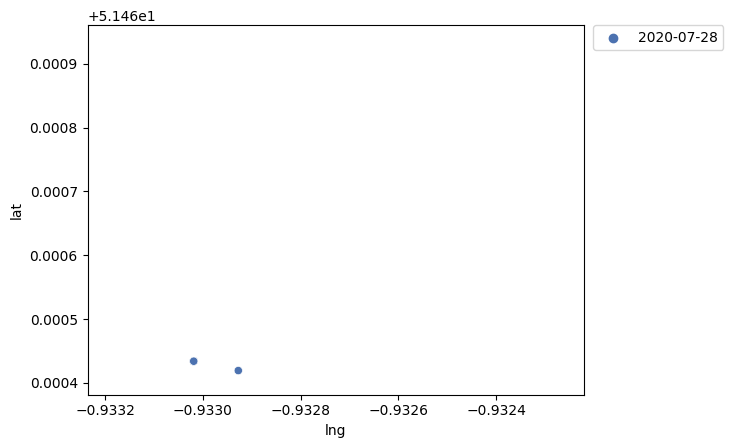

                                 99
designated_space                   
ClientMacAddr     00:0c:e7:c9:db:14
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


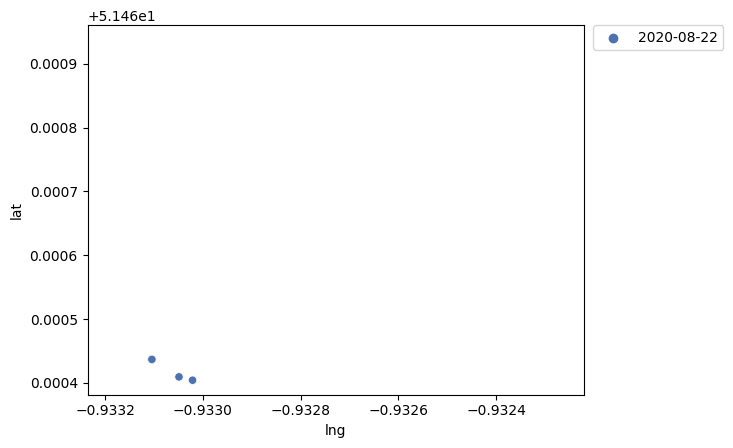

                                119
designated_space                   
ClientMacAddr     00:0c:e7:ef:e5:6b
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


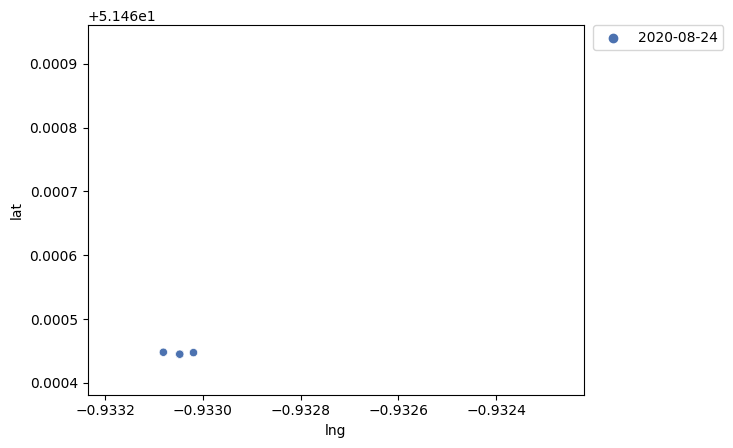

                                121
designated_space                   
ClientMacAddr     00:0c:e7:f4:04:28
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


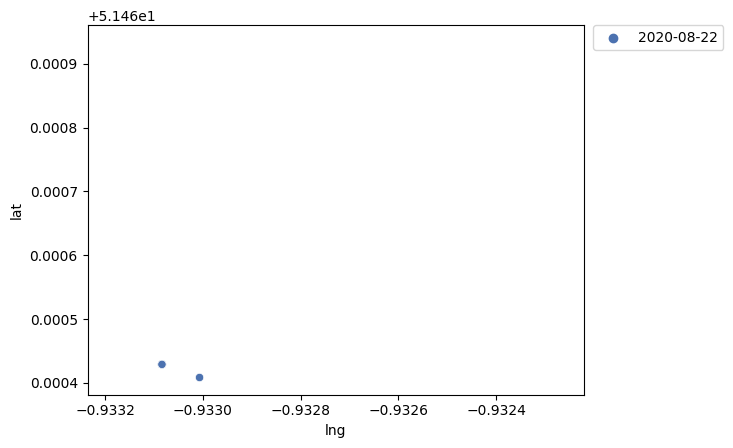

                                126
designated_space                   
ClientMacAddr     00:10:02:28:95:a7
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


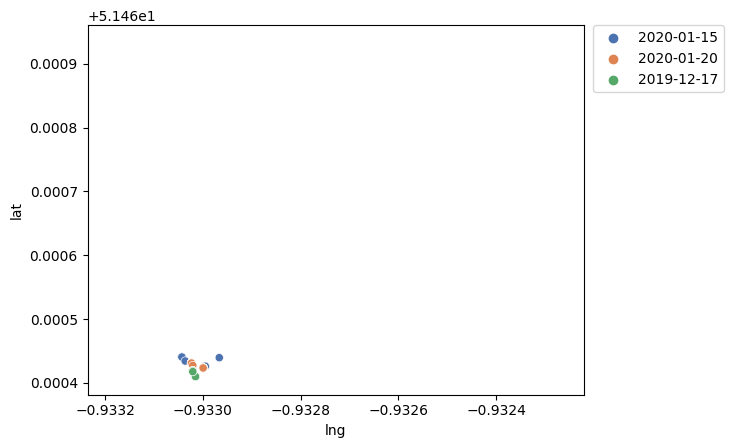

                                127
designated_space                   
ClientMacAddr     00:10:02:29:99:b5
admin_office                    0.0
assembly_line              0.471698
canteen                         0.0
control_rooms              0.471698
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                    0.056604
max_space             assembly_line


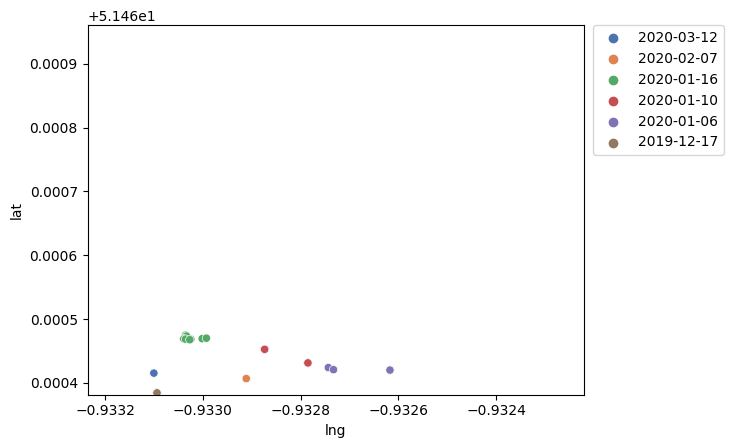

                                128
designated_space                   
ClientMacAddr     00:10:02:4a:d1:1d
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


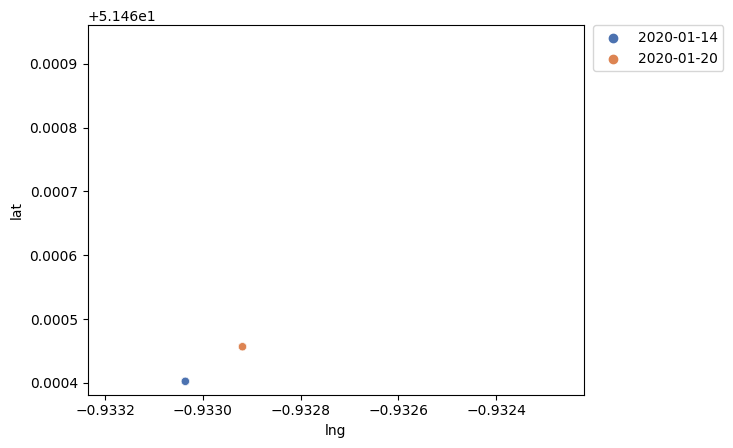

In [90]:
## plot the data with associated space
for i in vehicle_or_operator["ClientMacAddr"].unique()[:10]:
    print((vehicle_or_operator[vehicle_or_operator['ClientMacAddr'] == i]).T)
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[(df['ClientMacAddr'] == i)]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

### Assign Job function

In [91]:
# Create new column using dictionary
designated_space_mapping_dict = { 
             "canteen":"canteen_worker",
             "admin_office":"engineer", ## TODO: Change?
             "assembly_line":"operator",
             "entrance":"security_guard",
             "control_rooms": "operator",
             "lab": "researcher",
             "storage": "storage worker",
             "not_in_any": "visitor"
           }
  
# combine this new data with existing DataFrame
df_mobile_space_1F["job_function"] = df_mobile_space_1F["max_space"].map(designated_space_mapping_dict)

In [92]:
print(df_mobile_space_1F['job_function'].value_counts(dropna=False))
df_mobile_space_1F

operator          1843
researcher         775
visitor            648
storage worker     495
canteen_worker     448
engineer           426
security_guard      20
Name: job_function, dtype: int64


designated_space,ClientMacAddr,admin_office,assembly_line,canteen,control_rooms,entrance,lab,not_in_any,storage,max_space,job_function
0,00:08:22:20:bc:fb,0.666667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,admin_office,engineer
1,00:08:22:24:b7:fb,0.000000,0.000000,0.000000,0.000000,0.000000,0.909091,0.090909,0.000000,lab,researcher
2,00:08:22:26:bb:fb,0.500000,0.062500,0.000000,0.000000,0.062500,0.187500,0.062500,0.125000,admin_office,engineer
3,00:08:22:4c:c2:fb,0.000000,0.000000,0.000000,0.000000,0.000000,0.846154,0.000000,0.153846,lab,researcher
4,00:08:22:c0:c1:fb,0.000000,0.000000,0.916667,0.000000,0.000000,0.000000,0.083333,0.000000,canteen,canteen_worker
...,...,...,...,...,...,...,...,...,...,...,...
4650,fc:a4:79:ad:0e:71,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.285714,0.000000,lab,researcher
4651,fc:a6:67:be:c0:a5,0.034924,0.000000,0.040745,0.001164,0.000000,0.871944,0.051222,0.000000,lab,researcher
4652,fc:d8:48:80:ab:de,0.003175,0.415873,0.000000,0.000000,0.174603,0.000000,0.000000,0.406349,assembly_line,operator
4653,fc:f8:ae:5a:6f:ea,0.193146,0.000000,0.000000,0.000000,0.000000,0.803738,0.003115,0.000000,lab,researcher


In [93]:
len(df_mobile_space_1F['ClientMacAddr'].unique())

4655

In [94]:
print(df_mobile_space_1F['max_space'].value_counts(dropna=False))
print('---------------------------------')
print(df_mobile_space_1F['job_function'].value_counts(dropna=False))

assembly_line    1301
lab               775
not_in_any        648
control_rooms     542
storage           495
canteen           448
admin_office      426
entrance           20
Name: max_space, dtype: int64
---------------------------------
operator          1843
researcher         775
visitor            648
storage worker     495
canteen_worker     448
engineer           426
security_guard      20
Name: job_function, dtype: int64


In [95]:
Mobile_device_1F = Mobile_device.merge(df_mobile_space_1F[['ClientMacAddr','job_function']], on='ClientMacAddr', how='right').fillna("undefined")
Mobile_device_1F.tail(10)


,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed,job_function_x,job_function_y
4625,f8:c3:9e:fa:a4:77,51.460444,51.460417,-0.932551,-0.932664,12.939425,1,6,1.0,0.0,{working_hour},0.014128,Mobile Device,undefined,storage worker
4626,f8:cf:c5:7e:14:85,51.460499,51.460390,-0.932484,-0.933038,62.809850,3,60,3.0,0.0,{working_hour},0.205813,Mobile Device,undefined,operator
4627,f8:da:0c:07:43:e7,51.460501,51.460416,-0.932364,-0.933001,71.334899,3,71,3.0,0.0,{working_hour},0.395183,Mobile Device,undefined,engineer
4628,f8:e0:79:eb:48:68,51.460464,51.460405,-0.932376,-0.932658,31.959405,2,15,2.0,0.0,{working_hour},0.019555,Mobile Device,undefined,engineer
4629,f8:e9:4e:6a:3a:4d,51.460923,51.460689,-0.932232,-0.932292,26.811507,1,25,1.0,0.0,{working_hour},1.243319,Mobile Device,undefined,canteen_worker
4630,f8:ff:c2:01:d0:8d,51.460927,51.460392,-0.932223,-0.933186,122.499450,2,574,2.0,0.0,{working_hour},2.687263,Mobile Device,undefined,operator
4631,f8:ff:c2:85:30:29,51.460448,51.460402,-0.932976,-0.933036,8.334590,1,61,1.0,0.0,{working_hour},0.166745,Mobile Device,undefined,operator
4632,f8:ff:c2:8f:5d:16,51.460705,51.460572,-0.932248,-0.932306,16.073886,1,124,1.0,0.0,{working_hour},0.350359,Mobile Device,undefined,visitor
4633,f8:ff:c2:c0:0b:8b,51.460439,51.460382,-0.932497,-0.933062,63.129354,3,102,3.0,0.0,{working_hour},2.945834,Mobile Device,undefined,operator
4634,fc:18:3c:21:0f:d3,51.460937,51.460401,-0.932221,-0.932911,97.042589,1,871,1.0,0.0,{working_hour},4.427271,Mobile Device,undefined,visitor


In [96]:
Mobile_device_1F.loc[(Mobile_device_1F['job_function_y'] == 'operator') & (Mobile_device_1F['Distance(Meter)'] < 10),
                       'job_function_y'] = 'vehicle'


In [97]:
Mobile_device_1F['job_function_y'].value_counts(dropna=False)

operator          1452
researcher         775
visitor            648
storage worker     495
canteen_worker     448
engineer           426
vehicle            391
security_guard      20
Name: job_function_y, dtype: int64

In [98]:
len(Mobile_device_1F['ClientMacAddr'].unique())

4655

In [99]:
Mobile_device['job_function'].value_counts(dropna=False)

undefined         4655
canteen_worker     913
engineer           780
visitor            636
security_guard     271
IT_technician      262
intruder             3
Name: job_function, dtype: int64

In [100]:
Mobile_device_1F.loc[Mobile_device_1F['ClientMacAddr']=='fc:a6:67:be:c0:a5', 'job_function_y'].to_string(index=False)

'researcher'

In [101]:
# Identify intruders and security guards based on following logic
def merge_jobfunc(row):
    if row['job_function'] == 'undefined':
        return Mobile_device_1F[Mobile_device_1F['ClientMacAddr']==row['ClientMacAddr']]['job_function_y'].to_string(index=False)
    else:
        return row['job_function']

Mobile_device['job_function'] = Mobile_device.apply(merge_jobfunc, axis=1)

In [102]:
Mobile_device['job_function'].value_counts(dropna=False)

operator          1452
canteen_worker    1361
visitor           1284
engineer          1206
researcher         775
storage worker     495
vehicle            391
security_guard     291
IT_technician      262
intruder             3
Name: job_function, dtype: int64

## Define authority level for space
- Scale: 0 is lowest access - 4 is highest access
- operator          4 
- canteen_worker    1   
- visitor           1   
- engineer          4 
- researcher        4 
- storage worker    3 
- vehicle           N/A
- security_guard    4 
- IT_technician     2 
- intruder          0 


## For vehicle
- Scale: 0 and 1
- Only operator and storage worker have 1, otherwise 0

### Fixed device: machine and printer

In [107]:
Fix_device.head()


,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed,job_function
7622,80:58:f8:cc:10:67,51.4606,51.460574,-0.932327,-0.932364,4.997148,1,13,1.0,0.0,{working_hour},0.032159,Fixed Device,undefined
11691,90:b6:86:d0:92:53,51.460444,51.460423,-0.932642,-0.932681,4.99258,2,14,2.0,0.0,{working_hour},0.016924,Fixed Device,undefined
15020,d0:77:14:7f:b9:2c,51.460494,51.460474,-0.933169,-0.933209,4.988431,1,13,1.0,0.0,{working_hour},0.033606,Fixed Device,undefined
6838,80:58:f8:70:0f:66,51.460492,51.460448,-0.93303,-0.933038,4.977924,1,13,1.0,0.0,{working_hour},0.033331,Fixed Device,undefined
12348,a0:2c:36:50:ea:37,51.46042,51.460414,-0.932979,-0.933023,4.97593,2,14,2.0,0.0,{working_hour},0.016478,Fixed Device,undefined


In [105]:
# machinery_df = Fix_device[Fix_device["total_day"] > 5]
# print(machinery_df.shape)
# machinery_df

In [113]:
df_machine = df[(df['ClientMacAddr'].isin(Fix_device[Fix_device["total_day"] > 5]["ClientMacAddr"])) & 
               (df['Level'].isin(["1st Floor"]))]

df_printer = df[(df['ClientMacAddr'].isin(Fix_device[Fix_device["total_day"] > 5]["ClientMacAddr"])) & 
               (df['Level'].isin(["2nd Floor"]))]

print(df_machine['ClientMacAddr'].nunique())
print(df_printer['ClientMacAddr'].nunique()) # No printer

# TODO: What about the rest?

17
0


In [118]:
df_machine


,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session
253668,UK Office,1st Floor,40:b8:9a:cc:f6:5f,51.460404,-0.933021,2020-08-07 10:47:44.197000+00:00,2020-08-07 10:47:44.197000+00:00,2020-08-07,10,4,False,working_hour
253670,UK Office,1st Floor,40:b8:9a:cc:f6:5f,51.460404,-0.933021,2020-08-07 10:47:35.662000+00:00,2020-08-07 10:47:35.662000+00:00,2020-08-07,10,4,False,working_hour
253671,UK Office,1st Floor,40:b8:9a:cc:f6:5f,51.460404,-0.933021,2020-08-07 10:47:24.065000+00:00,2020-08-07 10:47:24.065000+00:00,2020-08-07,10,4,False,working_hour
253673,UK Office,1st Floor,40:b8:9a:cc:f6:5f,51.460404,-0.933021,2020-08-07 10:47:16.889000+00:00,2020-08-07 10:47:16.889000+00:00,2020-08-07,10,4,False,working_hour
253676,UK Office,1st Floor,40:b8:9a:cc:f6:5f,51.460404,-0.933021,2020-08-07 10:47:06.830000+00:00,2020-08-07 10:47:06.830000+00:00,2020-08-07,10,4,False,working_hour
...,...,...,...,...,...,...,...,...,...,...,...,...
33802843,UK Office,1st Floor,30:07:4d:f3:43:15,51.460404,-0.933021,2019-09-25 12:11:36.483000+00:00,2019-09-25 12:11:36.483000+00:00,2019-09-25,12,2,False,working_hour
33802902,UK Office,1st Floor,30:07:4d:f3:43:15,51.460404,-0.933021,2019-09-25 12:11:26.450000+00:00,2019-09-25 12:11:26.450000+00:00,2019-09-25,12,2,False,working_hour
33802952,UK Office,1st Floor,30:07:4d:f3:43:15,51.460404,-0.933021,2019-09-25 12:11:16.326000+00:00,2019-09-25 12:11:16.326000+00:00,2019-09-25,12,2,False,working_hour
33803007,UK Office,1st Floor,30:07:4d:f3:43:15,51.460404,-0.933021,2019-09-25 12:11:06.287000+00:00,2019-09-25 12:11:06.287000+00:00,2019-09-25,12,2,False,working_hour


In [114]:
Fix_device['job_function'] = 'undefined'
Fix_device.loc[Fix_device["ClientMacAddr"].isin(df_machine['ClientMacAddr'].unique()), 'job_function'] = 'machinery'
Fix_device.loc[Fix_device["ClientMacAddr"].isin(df_printer['ClientMacAddr'].unique()), 'job_function'] = 'printer'
Fix_device.head()

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed,job_function
7622,80:58:f8:cc:10:67,51.460600,51.460574,-0.932327,-0.932364,4.997148,1,13,1.0,0.0,{working_hour},0.032159,Fixed Device,undefined
11691,90:b6:86:d0:92:53,51.460444,51.460423,-0.932642,-0.932681,4.992580,2,14,2.0,0.0,{working_hour},0.016924,Fixed Device,undefined
15020,d0:77:14:7f:b9:2c,51.460494,51.460474,-0.933169,-0.933209,4.988431,1,13,1.0,0.0,{working_hour},0.033606,Fixed Device,undefined
6838,80:58:f8:70:0f:66,51.460492,51.460448,-0.933030,-0.933038,4.977924,1,13,1.0,0.0,{working_hour},0.033331,Fixed Device,undefined
12348,a0:2c:36:50:ea:37,51.460420,51.460414,-0.932979,-0.933023,4.975930,2,14,2.0,0.0,{working_hour},0.016478,Fixed Device,undefined


In [116]:
Fix_device['job_function'].value_counts() ## TODO: Could we deal with the undefined job_function?

undefined    10875
machinery       17
Name: job_function, dtype: int64

40:b8:9a:cc:f6:5f


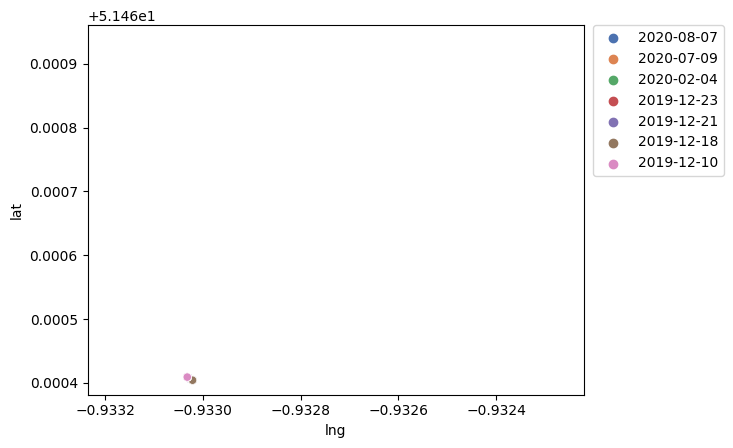

04:72:95:42:af:df


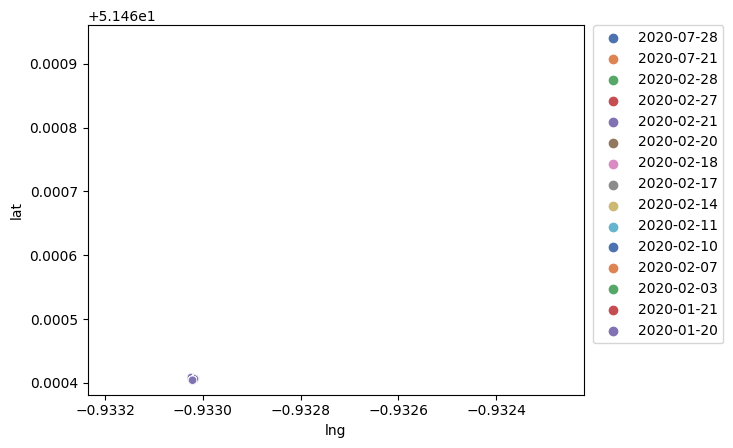

1c:5c:f2:ac:52:3f


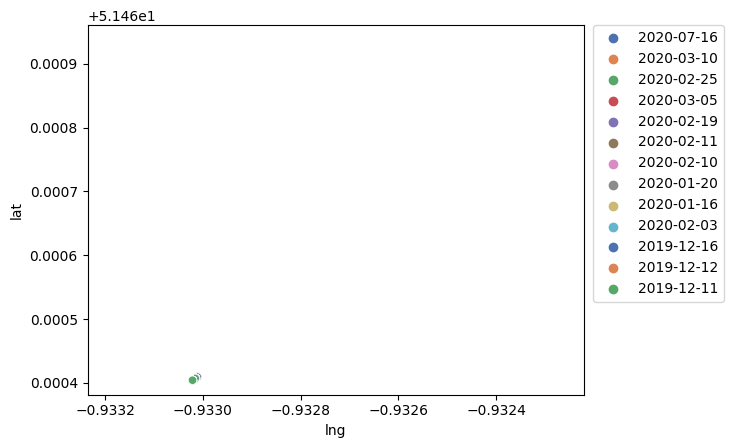

d8:68:c3:ae:29:73


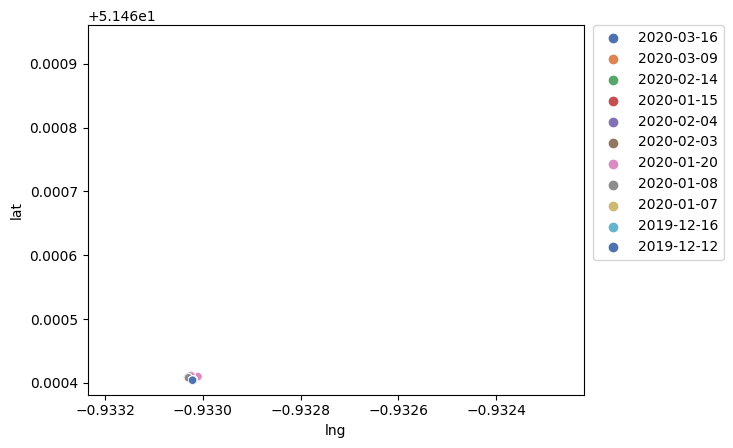

6c:c7:ec:66:ab:a5


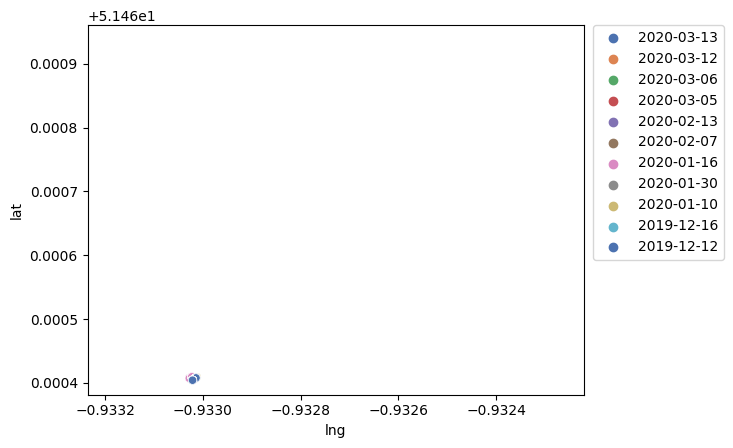

c4:e9:84:09:a4:6f


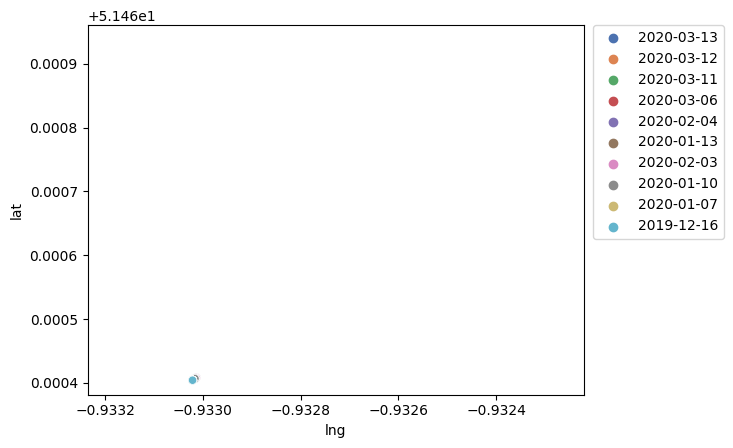

dc:53:60:c0:18:5e


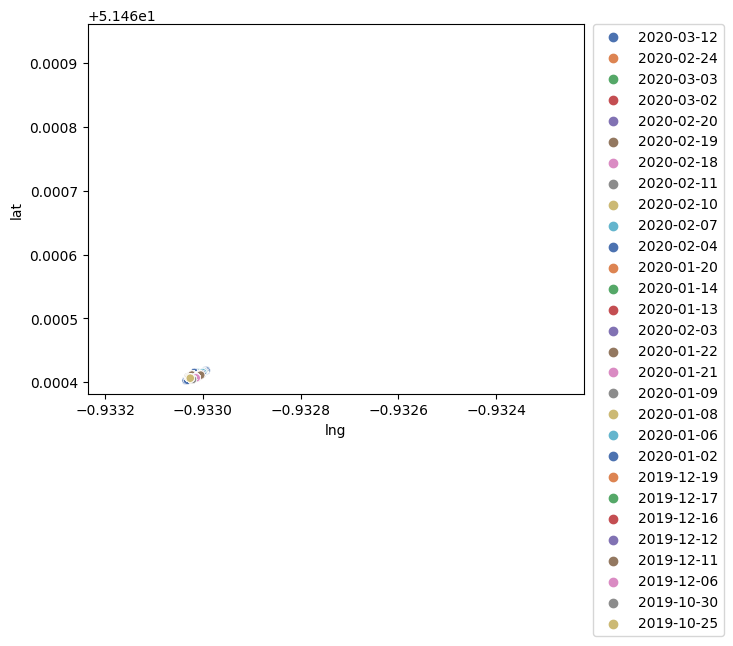

30:07:4d:f3:43:15


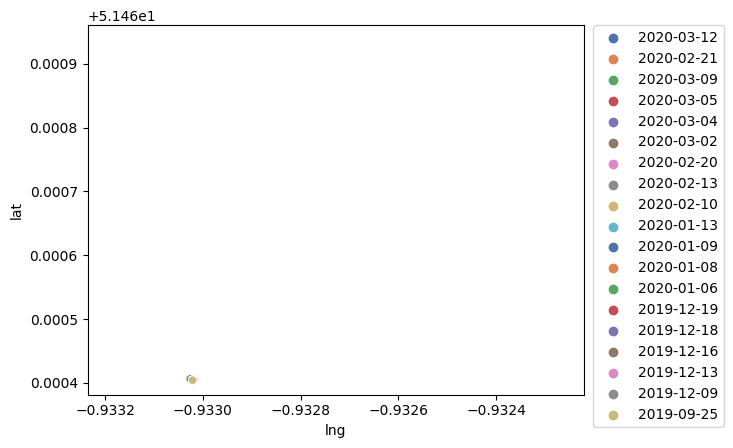

b4:6b:fc:06:18:69


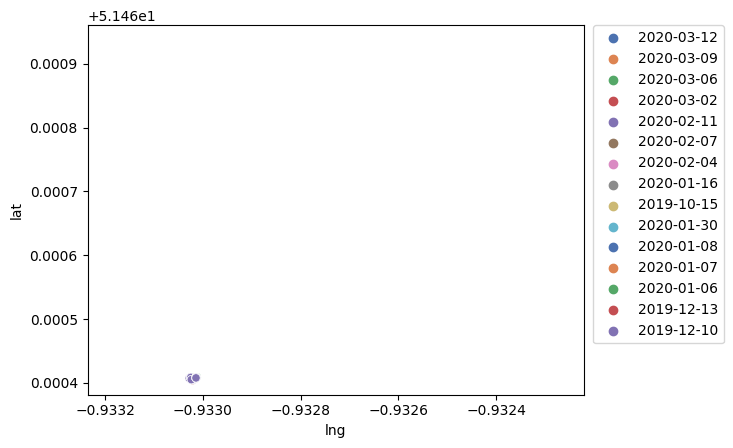

6c:c7:ec:6c:ec:9a


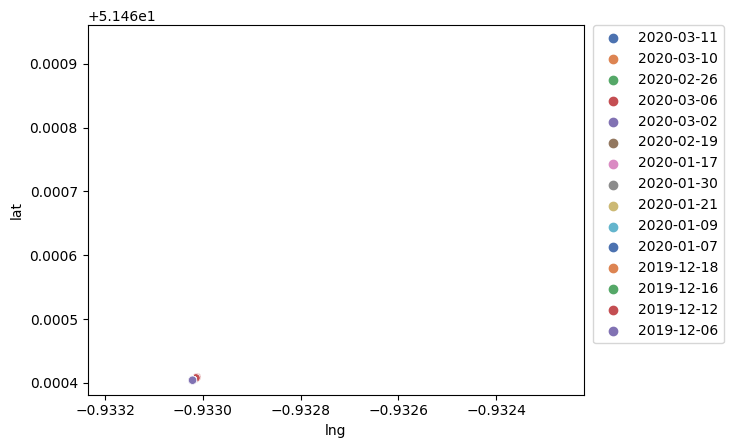

dc:53:60:c0:18:3b


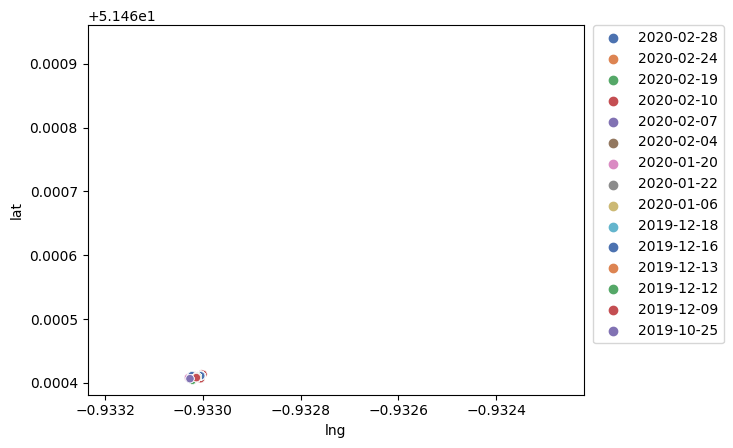

c4:9d:ed:8d:75:3f


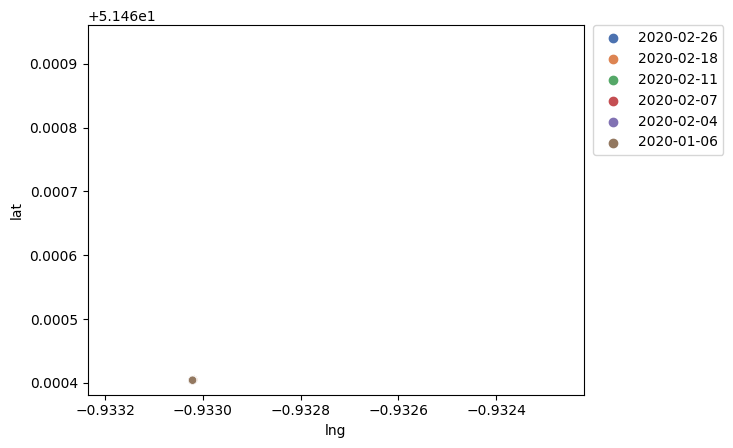

bc:e1:43:2a:fe:d9


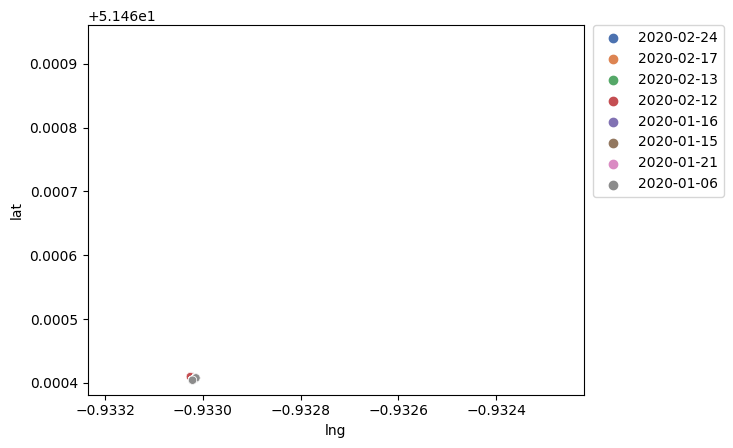

4c:66:41:db:99:33


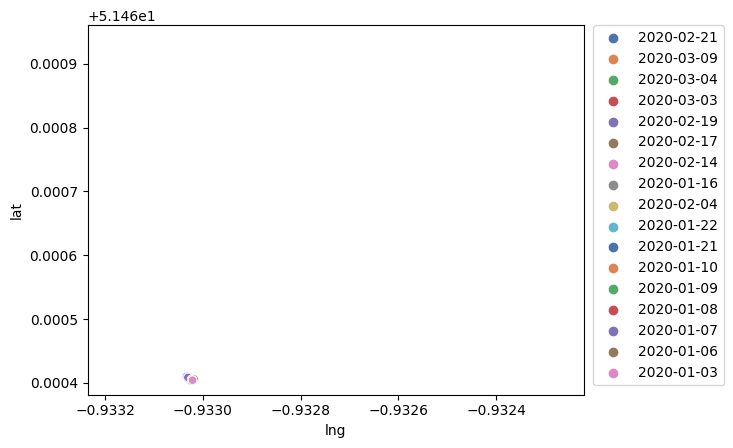

b4:f6:1c:11:ba:00


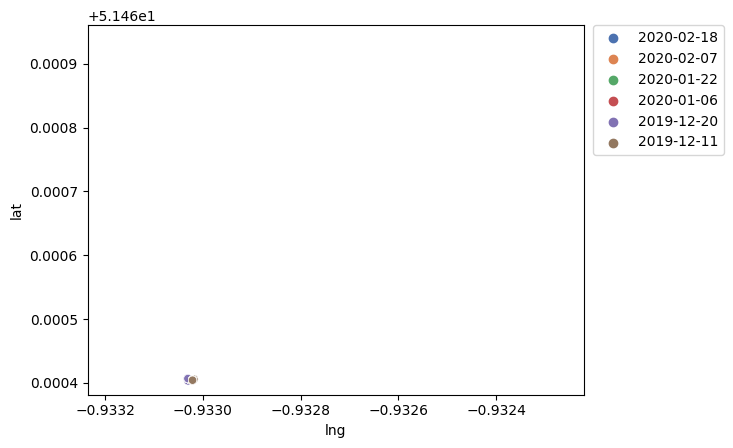

6c:00:6b:5f:40:2b


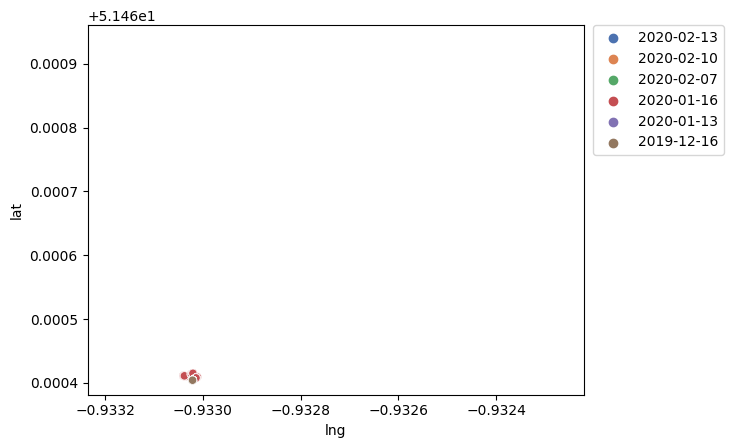

10:5b:ad:10:79:b7


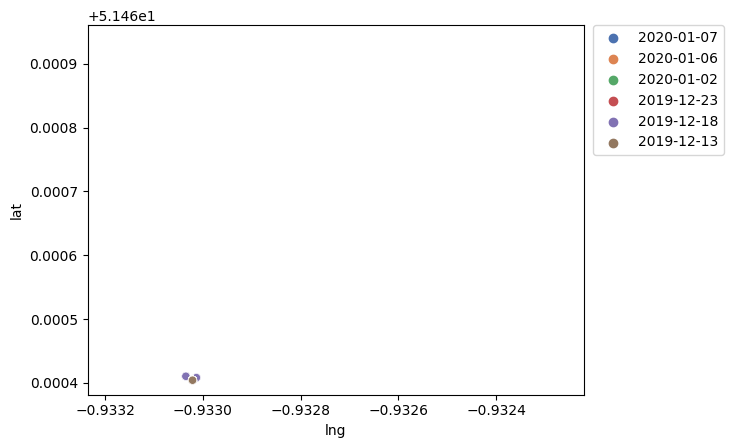

In [120]:
# plot machinary colored by level
for i in df_machine["ClientMacAddr"].unique():
    print(i)
    sns.scatterplot(x="lng", y="lat", data=df_machine[df_machine['ClientMacAddr'] == i], hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Scenarios:
- E-permitting --> Use vehicles without key/ unauthorized workers cannot use vehicles
- Virtual geofencing --> Notify when access unauthorized space/area --> intruders and visitors
- Machine not working --> A machine is malfunction --> notify the nearest workers

In [174]:
## Add authority level for vehicles
Mobile_device['veh_authority_level'] = 0
Mobile_device.loc[Mobile_device['job_function'].isin(['operator', 'storage worker']), 'veh_authority_level'] = 1
#Mobile_device.head()

## Check the authority level assignment for vehicle
Mobile_device[Mobile_device['job_function'].isin(['operator', 'storage worker'])]['veh_authority_level'].unique()

array([1])

In [135]:
### Left join df with job function for mobile device
df = df.merge(Mobile_device[['ClientMacAddr', 'job_function', 'veh_authority_level']], on='ClientMacAddr')
df.head()

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session,job_function
0,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:49.582000+00:00,2020-09-01 23:58:49.582000+00:00,2020-09-01,23,1,False,night_time,operator
1,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:38.112000+00:00,2020-09-01 23:58:38.112000+00:00,2020-09-01,23,1,False,night_time,operator
2,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460448,-0.933048,2020-09-01 23:58:29.514000+00:00,2020-09-01 23:58:29.514000+00:00,2020-09-01,23,1,False,night_time,operator
3,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:18.046000+00:00,2020-09-01 23:58:18.046000+00:00,2020-09-01,23,1,False,night_time,operator
4,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460445,-0.933048,2020-09-01 23:58:09.522000+00:00,2020-09-01 23:58:09.522000+00:00,2020-09-01,23,1,False,night_time,operator


## E-permitting
- Pick a date, plot all vehicles, operators, and storage workers 

In [175]:
Mobile_device

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed,job_function,veh_authority_level
0,cc:73:14:60:68:97,51.460960,51.460381,-0.932221,-0.933236,129.883520,94,167374,94.0,0.0,{working_hour},7.659719,Mobile Device,canteen_worker,0
1,b4:9c:df:7b:7d:a0,51.460960,51.460381,-0.932221,-0.933236,129.875798,26,41305,26.0,0.0,{working_hour},7.177091,Mobile Device,canteen_worker,0
2,bc:9f:ef:12:17:ff,51.460960,51.460382,-0.932221,-0.933236,129.873624,74,156147,74.0,0.0,{working_hour},8.550306,Mobile Device,visitor,0
3,a8:db:03:52:33:06,51.460960,51.460382,-0.932221,-0.933236,129.871349,56,85817,56.0,0.0,{working_hour},6.963287,Mobile Device,visitor,0
4,5c:5f:67:8b:28:01,51.460960,51.460381,-0.932221,-0.933236,129.864643,64,161339,64.0,0.0,{working_hour},7.954304,Mobile Device,visitor,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7515,5c:5f:67:8b:1b:f5,51.460613,51.460585,-0.932259,-0.932295,5.023312,1,13,1.0,0.0,{working_hour},0.036380,Mobile Device,visitor,0
7516,d0:77:14:8d:dc:a3,51.460437,51.460405,-0.932965,-0.932997,5.017370,1,13,1.0,0.0,{working_hour},0.032888,Mobile Device,vehicle,0
7517,d0:77:14:74:a3:e9,51.460435,51.460414,-0.933003,-0.933043,5.006274,1,13,1.0,0.0,{working_hour},0.030774,Mobile Device,vehicle,0
7518,f4:f5:24:21:2e:a9,51.460640,51.460612,-0.932385,-0.932421,5.004640,1,13,1.0,0.0,{working_hour},0.032136,Mobile Device,researcher,0


In [131]:
# Obtain mac id of 3 job functions
vec_mac_id = Mobile_device[Mobile_device['job_function']=='vehicle']['ClientMacAddr'].unique()
ope_mac_id = Mobile_device[Mobile_device['job_function']=='operator']['ClientMacAddr'].unique()
sto_mac_id = Mobile_device[Mobile_device['job_function']=='storage worker']['ClientMacAddr'].unique()

In [176]:
sim_ope_df = df[ (df['job_function'] == 'operator') & (df['date'] == dt.date(2019,10,26))]
sim_ope_df

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session,job_function,veh_authority_level
2706954,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460469,-0.932975,2019-10-26 23:59:57.135000+00:00,2019-10-26 23:59:57.135000+00:00,2019-10-26,23,5,True,night_time,operator,1
2706955,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460469,-0.932975,2019-10-26 23:59:47.105000+00:00,2019-10-26 23:59:47.105000+00:00,2019-10-26,23,5,True,night_time,operator,1
2706956,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460469,-0.932975,2019-10-26 23:59:37.079000+00:00,2019-10-26 23:59:37.079000+00:00,2019-10-26,23,5,True,night_time,operator,1
2706957,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460466,-0.932969,2019-10-26 23:59:27.055000+00:00,2019-10-26 23:59:27.055000+00:00,2019-10-26,23,5,True,night_time,operator,1
2706958,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460466,-0.932969,2019-10-26 23:59:16.624000+00:00,2019-10-26 23:59:16.624000+00:00,2019-10-26,23,5,True,night_time,operator,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715589,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460462,-0.932963,2019-10-26 00:00:48.058000+00:00,2019-10-26 00:00:48.058000+00:00,2019-10-26,0,5,True,night_time,operator,1
2715590,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460467,-0.932975,2019-10-26 00:00:38.030000+00:00,2019-10-26 00:00:38.030000+00:00,2019-10-26,0,5,True,night_time,operator,1
2715591,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460469,-0.932980,2019-10-26 00:00:27.603000+00:00,2019-10-26 00:00:27.603000+00:00,2019-10-26,0,5,True,night_time,operator,1
2715592,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460469,-0.932980,2019-10-26 00:00:17.567000+00:00,2019-10-26 00:00:17.567000+00:00,2019-10-26,0,5,True,night_time,operator,1


In [177]:
veh_df = Mobile_device[Mobile_device['job_function']=='vehicle'].sort_values(by=['total_day', 'total_signal'], ascending=False)
veh_df

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,set,avg_time_per_day,Mobile_or_fixed,job_function,veh_authority_level
6560,00:10:02:28:95:a7,51.460441,51.460410,-0.932966,-0.933043,9.158036,3,183,3.0,0.0,{working_hour},0.166627,Mobile Device,vehicle,0
7368,cc:61:e5:11:e7:d0,51.460414,51.460404,-0.932972,-0.933021,5.569122,3,51,3.0,0.0,{working_hour},0.393009,Mobile Device,vehicle,0
6900,b4:ec:02:1c:26:e6,51.460470,51.460403,-0.933028,-0.933036,7.462755,2,39,2.0,0.0,{working_hour},0.395950,Mobile Device,vehicle,0
7427,18:62:e4:bc:89:81,51.460425,51.460411,-0.933009,-0.933055,5.350079,2,38,2.0,0.0,{working_hour},2.360929,Mobile Device,vehicle,0
6526,80:58:f8:da:79:99,51.460457,51.460428,-0.932853,-0.932933,9.337486,2,37,2.0,0.0,{working_hour},0.094023,Mobile Device,vehicle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,34:79:16:fa:32:c4,51.460438,51.460423,-0.932996,-0.933062,7.543856,1,2,1.0,0.0,{working_hour},0.002897,Mobile Device,vehicle,0
7038,c4:36:6c:24:81:45,51.460498,51.460494,-0.933159,-0.933221,6.885231,1,2,1.0,0.0,{working_hour},0.038789,Mobile Device,vehicle,0
7108,40:83:de:d6:42:84,51.460412,51.460408,-0.932914,-0.932973,6.547468,1,2,1.0,0.0,{working_hour},0.001983,Mobile Device,vehicle,0
7238,74:9e:af:16:2b:70,51.460497,51.460494,-0.933166,-0.933221,6.033871,1,2,1.0,0.0,{working_hour},0.002787,Mobile Device,vehicle,0


00:10:02:28:95:a7


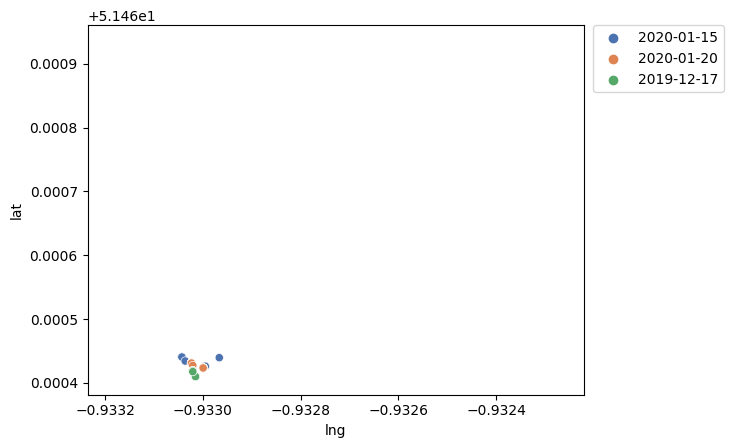

cc:61:e5:11:e7:d0


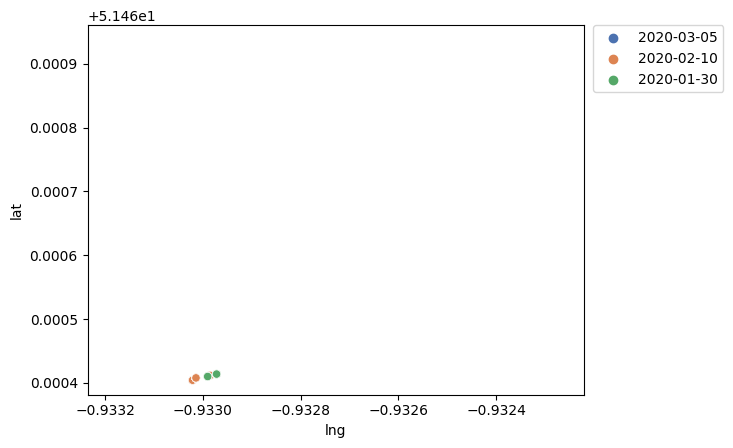

b4:ec:02:1c:26:e6


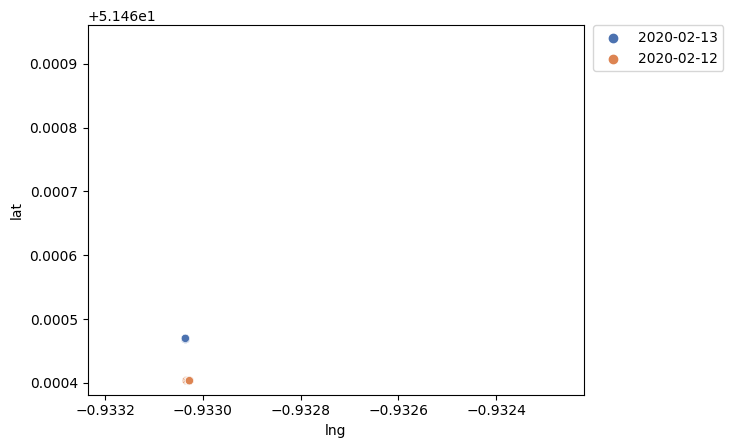

18:62:e4:bc:89:81


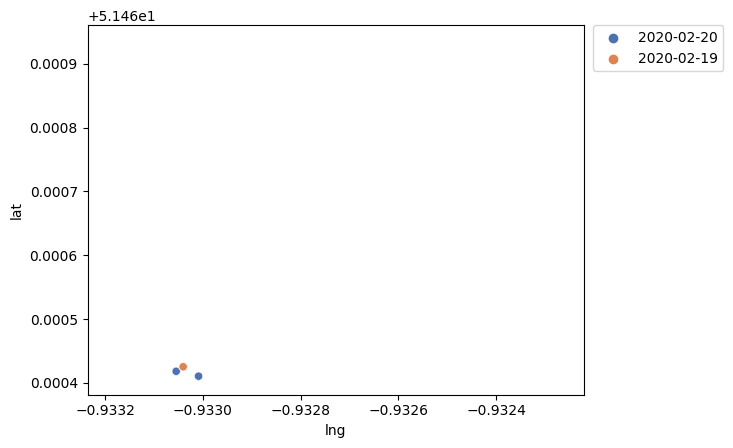

80:58:f8:da:79:99


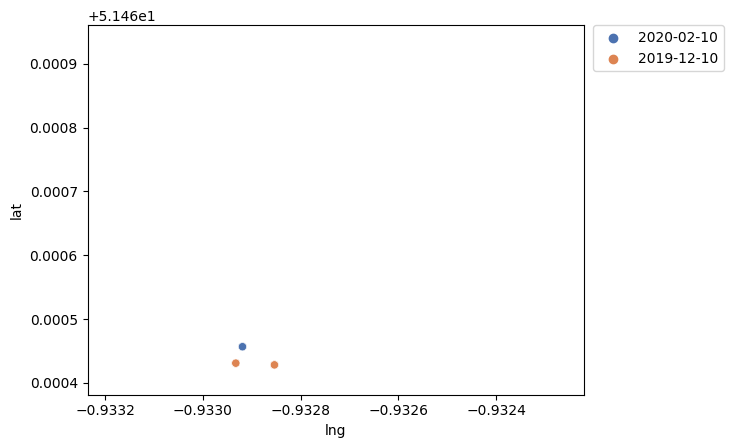

38:80:df:e4:09:0c


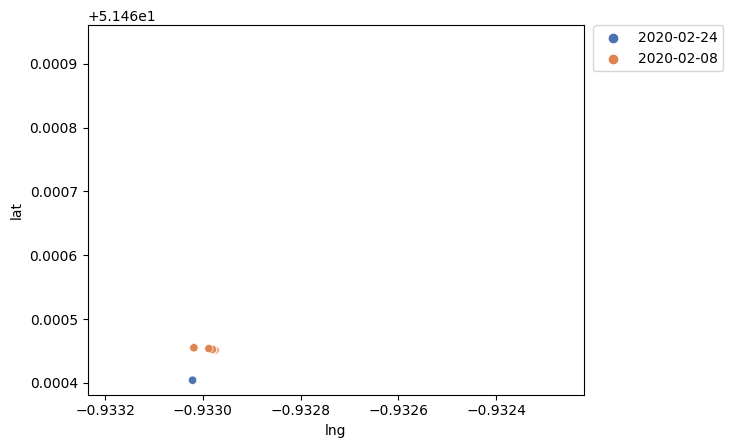

18:fe:34:b1:c0:ec


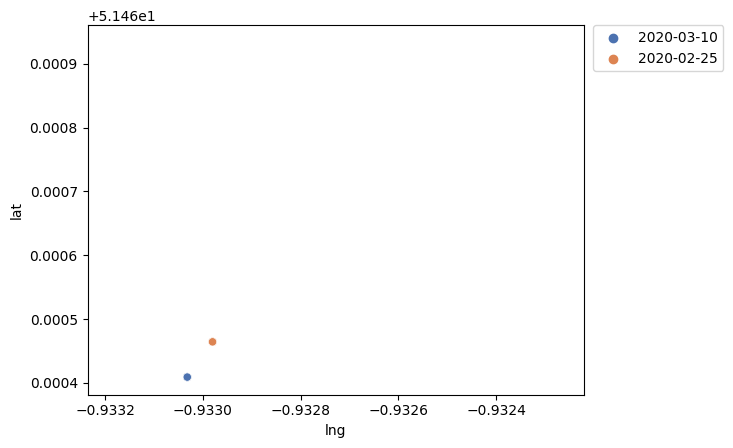

6c:c7:ec:9a:64:bc


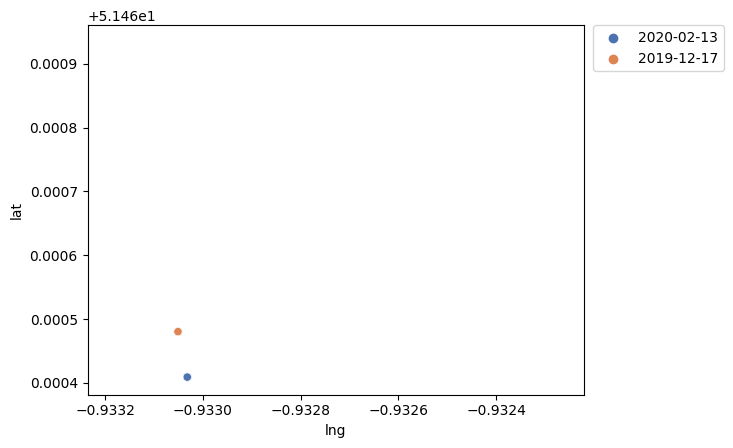

3c:f7:a4:ab:5a:55


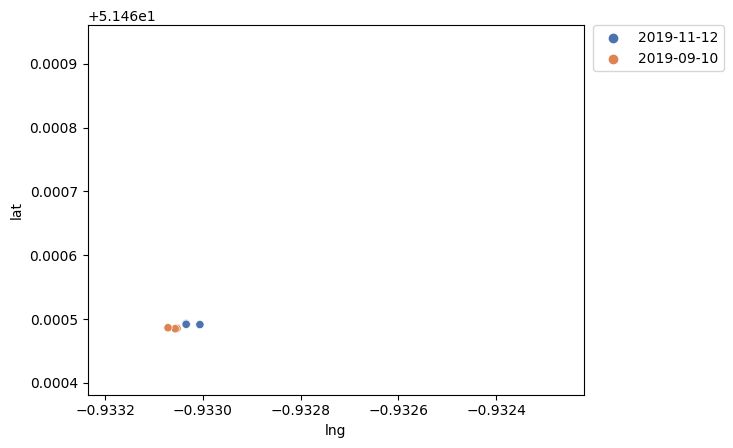

c4:93:d9:21:51:1c


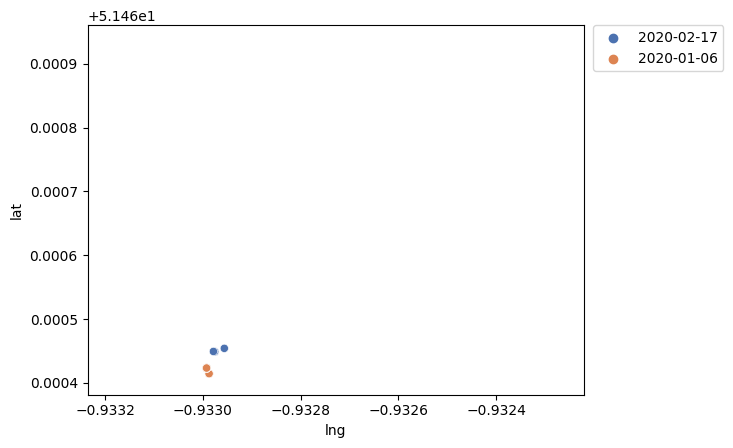

In [149]:
# plot vehicles colored by date
for i in veh_df['ClientMacAddr'][:10]:
    print(i)
    sns.scatterplot(x="lng", y="lat", data=df[df['ClientMacAddr'] == i], hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [178]:
sim_veh_df = df[ (df['ClientMacAddr'] == '00:10:02:28:95:a7') & (df['date'] == dt.date(2020,1,15))]
sim_veh_df.sort_values(by=['localtime'],inplace=True)

/var/folders/_j/h7l14zmj2nj1q591lbmhszpm0000gn/T/ipykernel_24199/4170386899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_veh_df.sort_values(by=['localtime'],inplace=True)


In [179]:
sim_veh_df[sim_veh_df['hour']==16]

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session,job_function,veh_authority_level
58002182,UK Office,1st Floor,00:10:02:28:95:a7,51.460440,-0.932966,2020-01-15 16:52:19.431000+00:00,2020-01-15 16:52:19.431000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0
58002181,UK Office,1st Floor,00:10:02:28:95:a7,51.460434,-0.933036,2020-01-15 16:52:25.657000+00:00,2020-01-15 16:52:25.657000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0
58002180,UK Office,1st Floor,00:10:02:28:95:a7,51.460441,-0.933043,2020-01-15 16:52:35.784000+00:00,2020-01-15 16:52:35.784000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0
58002179,UK Office,1st Floor,00:10:02:28:95:a7,51.460441,-0.933043,2020-01-15 16:52:45.800000+00:00,2020-01-15 16:52:45.800000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0
58002178,UK Office,1st Floor,00:10:02:28:95:a7,51.460441,-0.933043,2020-01-15 16:52:55.918000+00:00,2020-01-15 16:52:55.918000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0
58002177,UK Office,1st Floor,00:10:02:28:95:a7,51.460441,-0.933043,2020-01-15 16:53:05.946000+00:00,2020-01-15 16:53:05.946000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0
58002176,UK Office,1st Floor,00:10:02:28:95:a7,51.460441,-0.933043,2020-01-15 16:53:15.976000+00:00,2020-01-15 16:53:15.976000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0
58002175,UK Office,1st Floor,00:10:02:28:95:a7,51.460441,-0.933043,2020-01-15 16:53:26.093000+00:00,2020-01-15 16:53:26.093000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0
58002174,UK Office,1st Floor,00:10:02:28:95:a7,51.460441,-0.933043,2020-01-15 16:53:36.120000+00:00,2020-01-15 16:53:36.120000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0
58002173,UK Office,1st Floor,00:10:02:28:95:a7,51.460441,-0.933043,2020-01-15 16:53:46.150000+00:00,2020-01-15 16:53:46.150000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0


In [194]:
sim_all_df = df[ (df['date'] == dt.date(2020,1,15)) & (df['hour'] == 16) * (df['Level'] == '1st Floor')]
sim_all_df

/Users/khaninsi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  warnings.warn(


,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session,job_function,veh_authority_level,min
1831801,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460464,-0.932982,2020-01-15 16:59:57.497000+00:00,2020-01-15 16:59:57.497000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
1831802,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460450,-0.933023,2020-01-15 16:59:47.476000+00:00,2020-01-15 16:59:47.476000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
1831803,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460450,-0.933023,2020-01-15 16:59:37.445000+00:00,2020-01-15 16:59:37.445000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
1831804,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460450,-0.933023,2020-01-15 16:59:27.319000+00:00,2020-01-15 16:59:27.319000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
1831805,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460476,-0.933018,2020-01-15 16:59:19.444000+00:00,2020-01-15 16:59:19.444000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64512970,UK Office,1st Floor,34:78:d7:c4:a0:71,51.460805,-0.932256,2020-01-15 16:37:28.705000+00:00,2020-01-15 16:37:28.705000+00:00,2020-01-15,16,2,False,working_hour,researcher,0,37
64512971,UK Office,1st Floor,34:78:d7:c4:a0:71,51.460776,-0.932278,2020-01-15 16:37:18.682000+00:00,2020-01-15 16:37:18.682000+00:00,2020-01-15,16,2,False,working_hour,researcher,0,37
64512972,UK Office,1st Floor,34:78:d7:c4:a0:71,51.460776,-0.932278,2020-01-15 16:37:08.668000+00:00,2020-01-15 16:37:08.668000+00:00,2020-01-15,16,2,False,working_hour,researcher,0,37
64512973,UK Office,1st Floor,34:78:d7:c4:a0:71,51.460776,-0.932278,2020-01-15 16:36:58.535000+00:00,2020-01-15 16:36:58.535000+00:00,2020-01-15,16,2,False,working_hour,researcher,0,36


In [195]:
# Filter only mac id in assembly line 
sim_all_df = sim_all_df.query("lat>=51.46037535823833 and lat<=51.46053231597175")
sim_all_df = sim_all_df.query("lng>=-0.933292264577848 and lng<=-0.9329178977311808")

In [206]:
sim_all_df = sim_all_df[sim_all_df['min'] == 59]

In [211]:
sim_all_df

,Site,Level,ClientMacAddr,lat,lng,localtime,normalized_time,date,hour,dayOfWeek,IsWeekend,session,job_function,veh_authority_level,min
1831801,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460464,-0.932982,2020-01-15 16:59:57.497000+00:00,2020-01-15 16:59:57.497000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
1831802,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460450,-0.933023,2020-01-15 16:59:47.476000+00:00,2020-01-15 16:59:47.476000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
1831803,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460450,-0.933023,2020-01-15 16:59:37.445000+00:00,2020-01-15 16:59:37.445000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
1831804,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460450,-0.933023,2020-01-15 16:59:27.319000+00:00,2020-01-15 16:59:27.319000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
1831805,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460476,-0.933018,2020-01-15 16:59:19.444000+00:00,2020-01-15 16:59:19.444000+00:00,2020-01-15,16,2,False,working_hour,operator,1,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58002137,UK Office,1st Floor,00:10:02:28:95:a7,51.460426,-0.932995,2020-01-15 16:59:58.503000+00:00,2020-01-15 16:59:58.503000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0,59
58002138,UK Office,1st Floor,00:10:02:28:95:a7,51.460426,-0.932995,2020-01-15 16:59:48.474000+00:00,2020-01-15 16:59:48.474000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0,59
58002139,UK Office,1st Floor,00:10:02:28:95:a7,51.460426,-0.932995,2020-01-15 16:59:38.426000+00:00,2020-01-15 16:59:38.426000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0,59
58002140,UK Office,1st Floor,00:10:02:28:95:a7,51.460426,-0.932995,2020-01-15 16:59:28.410000+00:00,2020-01-15 16:59:28.410000+00:00,2020-01-15,16,2,False,working_hour,vehicle,0,59


In [207]:
sim_all_df['job_function'].unique()

array(['operator', 'canteen_worker', 'visitor', 'security_guard',
       'engineer', 'IT_technician', 'storage worker', 'vehicle'],
      dtype=object)

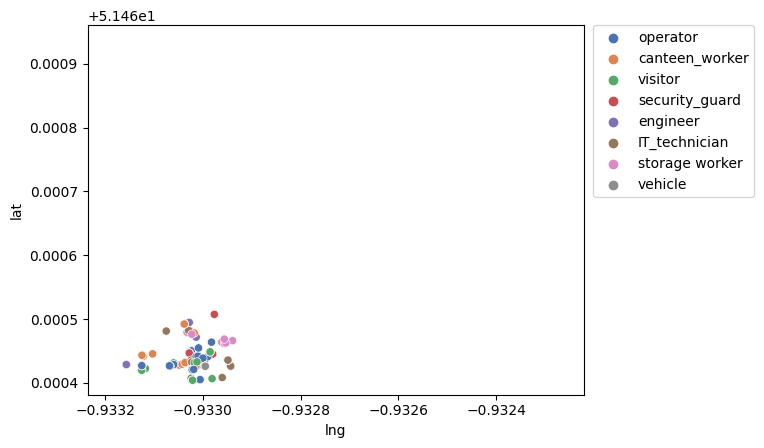

In [208]:
sns.scatterplot(x="lng", y="lat", data=sim_all_df, hue="job_function", palette="deep")
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

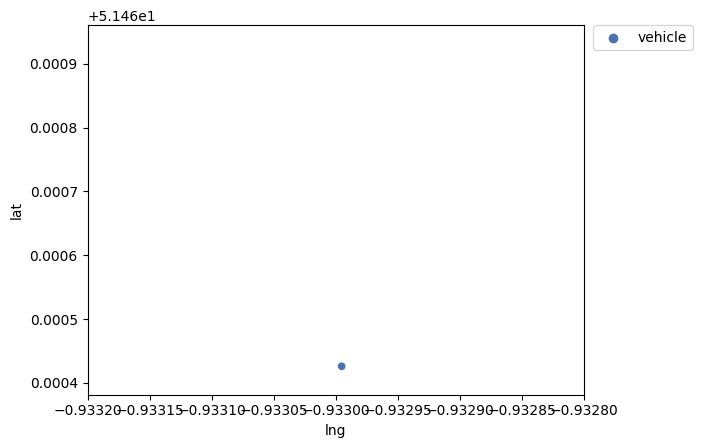

In [280]:
sns.scatterplot(x="lng", y="lat", data=sim_all_df[sim_all_df['job_function'] == 'vehicle'], 
                hue="job_function", palette="deep", , 
                hue_order=["vehicle"])
plt.xlim([-0.9332, -0.9328])
plt.ylim([min_lat, max_lat])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

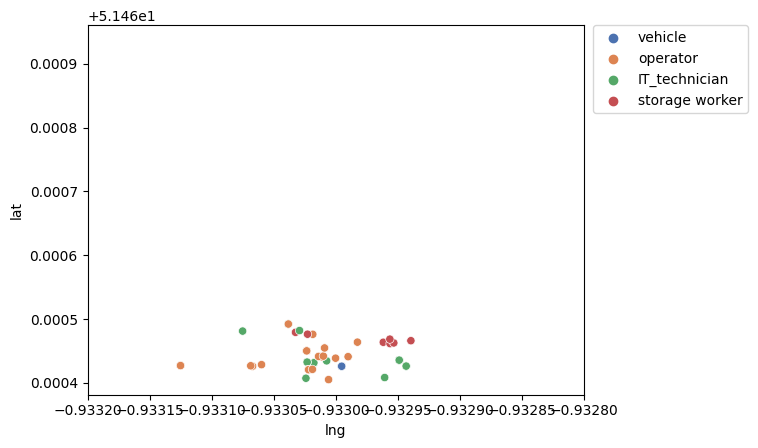

In [282]:
sns.scatterplot(x="lng", y="lat", data=sim_all_df[sim_all_df['job_function'].isin(['vehicle', 'operator', 'storage worker', 'IT_technician'])], 
                hue="job_function", palette="deep", hue_order=["vehicle", "operator", "IT_technician", "storage worker"])
plt.xlim([-0.9332, -0.9328])
plt.ylim([min_lat, max_lat])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [244]:
sample_operator = sim_all_df[sim_all_df['job_function'] == 'operator'].reset_index(drop=True).loc[0, ['ClientMacAddr', 'lat', 'lng', 'localtime', 'job_function', 'veh_authority_level']]
sample_it_tech = sim_all_df[sim_all_df['job_function'] == 'IT_technician'].reset_index(drop=True).loc[0, ['ClientMacAddr', 'lat', 'lng', 'localtime', 'job_function', 'veh_authority_level']]
sample_storage_worker = sim_all_df[sim_all_df['job_function'] == 'storage worker'].reset_index(drop=True).loc[0, ['ClientMacAddr', 'lat', 'lng', 'localtime', 'job_function', 'veh_authority_level']]
sample_visitor = sim_all_df[sim_all_df['job_function'] == 'visitor'].reset_index(drop=True).loc[0, ['ClientMacAddr', 'lat', 'lng', 'localtime', 'job_function', 'veh_authority_level']]

In [245]:
sample_operator

ClientMacAddr                         9c:8c:6e:46:1c:5e
lat                                           51.460464
lng                                           -0.932982
localtime              2020-01-15 16:59:57.497000+00:00
job_function                                   operator
veh_authority_level                                   1
Name: 0, dtype: object

In [271]:
def is_autho_vehicle(mac_id_df):
    print('ClientMacAddr: {}'.format(mac_id_df['ClientMacAddr']))
    print('Job function: {}'.format(mac_id_df['job_function']))
    if mac_id_df['veh_authority_level'] == 1:
        print('Authorized!')
    else:
        print('Unauthorized')

In [276]:
is_autho_vehicle(sample_operator)
print()
is_autho_vehicle(sample_storage_worker)

ClientMacAddr: 9c:8c:6e:46:1c:5e
Job function: operator
Authorized!

ClientMacAddr: 9c:da:3e:7f:a0:df
Job function: storage worker
Authorized!


In [277]:
is_autho_vehicle(sample_it_tech)
print()
is_autho_vehicle(sample_visitor)

ClientMacAddr: e4:a7:a0:94:dc:16
Job function: IT_technician
Unauthorized

ClientMacAddr: 88:66:a5:11:93:79
Job function: visitor
Unauthorized


## TODO:
- From professor feedback, he mentioned when a fixed device is moved or gone misssing. Should we implement this?